<a href="https://colab.research.google.com/github/Kartik-Singhal26/Anomaly-Detection-iTrust/blob/main/Anomaly_Detection_iTrust_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

warnings.warn("this will not show")

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jul  8 06:38:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch
import plotly
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score, f1_score, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, plot_roc_curve
import seaborn as sns
import math as m
import random

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
swat_dataset_attack = "/content/drive/MyDrive/SwatDatasets/SWaT_Dataset_Attack_v0.xlsx"
swat_dataset_normal = "/content/drive/MyDrive/SwatDatasets/SWaT_Dataset_Normal_v0.xlsx"

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(1)
rcParams['figure.figsize'] = 15,5
plt.style.use('seaborn-white')
sns.set(context = 'paper', style = "whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

# The Data

## About the Dataset and TestBed

SWaT consists of a modern six-stage process. The process begins by taking in raw water, adding necessary chemicals to it, filtering it via an Ultrafiltration (UF) system, de-chlorinating it using UV lamps, and then feeding it to a Reverse Osmosis (RO) system. A backwash process cleans the membranes in UF using the water produced by RO. The cyber portion of SWaT consists of a layered communications network, Programmable Logic Controllers (PLCs), Human Machine Interfaces (HMIs), Supervisory Control and Data Acquisition  (SCADA) workstation, and a Historian. Data from sensors is available to the SCADA system and recorded by the Historian for subsequent analysis.

In the first phase of this research, models of SWaT will be created using advanced tools such as LabView and Simulink. Models so created will be used to conduct initial experiments aimed at understanding the response of SWaT to a variety of cyber attacks. Attacks by insiders and outsiders will be considered. This first round of experiments will lead to an understanding of the strengths and weaknesses of the existing defense mechanism in SWaT.

In the second stage, a small set of cyber attacks will be tried in the testbed using carefully designed experiments that ensure no damage to the physical system. Such experiments are aimed at verifying whether that what is learnt in simulation applies to the physical testbed. These experiments will lead to an understanding of the weaknesses of the defense mechanism of SWaT.

The third stage is expected to lead to enhancement of the defence mechanism using a redesign of the hardware and updated PLC and SCADA software. The redesigned defence mechanism will then be tested against a variety of attacks in the updated simulation model and the testbed.

### Import and Prepare the SWAT Dataset

In [ ]:
# Importing Training Dataset
SWAT_Dataset_N = pd.read_excel(swat_dataset_normal)  
SWAT_Dataset_N

Unnamed: 0       P1  ... Unnamed: 51    Unnamed: 52
0                    Timestamp   FIT101  ...        P603  Normal/Attack
1        22/12/2015 4:00:00 PM  2.47029  ...           1         Normal
2        22/12/2015 4:00:01 PM  2.45716  ...           1         Normal
3        22/12/2015 4:00:02 PM  2.43955  ...           1         Normal
4        22/12/2015 4:00:03 PM  2.42834  ...           1         Normal
...                        ...      ...  ...         ...            ...
496796   28/12/2015 9:59:55 AM  2.46037  ...           1         Normal
496797   28/12/2015 9:59:56 AM  2.44884  ...           1         Normal
496798   28/12/2015 9:59:57 AM  2.43474  ...           1         Normal
496799   28/12/2015 9:59:58 AM  2.42834  ...           1         Normal
496800   28/12/2015 9:59:59 AM  2.42706  ...           1         Normal

[496801 rows x 53 columns]

In [ ]:
# Rename Header values from Row 0
SWAT_Dataset_N.columns = SWAT_Dataset_N.iloc[0]

# Drop 0 Row
SWAT_Dataset_N = SWAT_Dataset_N.drop(SWAT_Dataset_N.index[[0,1]])

# Print Dataframe
SWAT_Dataset_N

0                    Timestamp   FIT101   LIT101  ... P602 P603 Normal/Attack
2        22/12/2015 4:00:01 PM  2.45716  261.188  ...    1    1        Normal
3        22/12/2015 4:00:02 PM  2.43955  260.913  ...    1    1        Normal
4        22/12/2015 4:00:03 PM  2.42834  260.285  ...    1    1        Normal
5        22/12/2015 4:00:04 PM  2.42482  259.892  ...    1    1        Normal
6        22/12/2015 4:00:05 PM  2.42546   260.05  ...    1    1        Normal
...                        ...      ...      ...  ...  ...  ...           ...
496796   28/12/2015 9:59:55 AM  2.46037  523.043  ...    1    1        Normal
496797   28/12/2015 9:59:56 AM  2.44884  522.965  ...    1    1        Normal
496798   28/12/2015 9:59:57 AM  2.43474  522.886  ...    1    1        Normal
496799   28/12/2015 9:59:58 AM  2.42834  522.925  ...    1    1        Normal
496800   28/12/2015 9:59:59 AM  2.42706  522.847  ...    1    1        Normal

[496799 rows x 53 columns]

In [ ]:
Headers = list(SWAT_Dataset_N.columns.values)
Headers

[' Timestamp',
 'FIT101',
 'LIT101',
 'MV101',
 'P101',
 'P102',
 'AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 'MV201',
 'P201',
 'P202',
 'P203',
 'P204',
 'P205',
 'P206',
 'DPIT301',
 'FIT301',
 'LIT301',
 'MV301',
 'MV302',
 'MV303',
 'MV304',
 'P301',
 'P302',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'P501',
 'P502',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601',
 'P601',
 'P602',
 'P603',
 'Normal/Attack']

In [ ]:
SWAT_Dataset_N.isnull().values.any()

False

##### If there are any null values. Drop the corresponding rows/columns.

In [ ]:
SWAT_Dataset_N = SWAT_Dataset_N.dropna(axis=0, how='any')
SWAT_Dataset_N

0                    Timestamp   FIT101   LIT101  ... P602 P603 Normal/Attack
2        22/12/2015 4:00:01 PM  2.45716  261.188  ...    1    1        Normal
3        22/12/2015 4:00:02 PM  2.43955  260.913  ...    1    1        Normal
4        22/12/2015 4:00:03 PM  2.42834  260.285  ...    1    1        Normal
5        22/12/2015 4:00:04 PM  2.42482  259.892  ...    1    1        Normal
6        22/12/2015 4:00:05 PM  2.42546   260.05  ...    1    1        Normal
...                        ...      ...      ...  ...  ...  ...           ...
496796   28/12/2015 9:59:55 AM  2.46037  523.043  ...    1    1        Normal
496797   28/12/2015 9:59:56 AM  2.44884  522.965  ...    1    1        Normal
496798   28/12/2015 9:59:57 AM  2.43474  522.886  ...    1    1        Normal
496799   28/12/2015 9:59:58 AM  2.42834  522.925  ...    1    1        Normal
496800   28/12/2015 9:59:59 AM  2.42706  522.847  ...    1    1        Normal

[496799 rows x 53 columns]

In [ ]:
SWAT_Dataset_N.isnull().values.any()

False

In [ ]:
Timestamp = SWAT_Dataset_N[' Timestamp'].str.split(' ', expand=True)
SWAT_Dataset_N['Date'] = Timestamp[1]
SWAT_Dataset_N['Time'] = Timestamp[2]
SWAT_Dataset_N['Period'] = Timestamp[3]

In [ ]:
SWAT_Dataset_N = pd.concat([SWAT_Dataset_N.iloc[:,-3:], SWAT_Dataset_N.iloc[:,1:-3]], axis = 1)

In [ ]:
# Replace Values: Normal with 0 
SWAT_Dataset_N = SWAT_Dataset_N.replace(to_replace = "Normal",
                 value = 0)

# Replace Values: Attack with 1
SWAT_Dataset_N = SWAT_Dataset_N.replace(to_replace = "Attack",
                 value = 1)

In [ ]:
SWAT_Dataset_N

0             Date     Time Period    FIT101  ...  P601  P602  P603  Normal/Attack
2       22/12/2015  4:00:01     PM  2.457163  ...     1     1     1              0
3       22/12/2015  4:00:02     PM  2.439548  ...     1     1     1              0
4       22/12/2015  4:00:03     PM  2.428338  ...     1     1     1              0
5       22/12/2015  4:00:04     PM  2.424815  ...     1     1     1              0
6       22/12/2015  4:00:05     PM  2.425456  ...     1     1     1              0
...            ...      ...    ...       ...  ...   ...   ...   ...            ...
496796  28/12/2015  9:59:55     AM  2.460366  ...     1     1     1              0
496797  28/12/2015  9:59:56     AM  2.448836  ...     1     1     1              0
496798  28/12/2015  9:59:57     AM  2.434744  ...     1     1     1              0
496799  28/12/2015  9:59:58     AM  2.428338  ...     1     1     1              0
496800  28/12/2015  9:59:59     AM  2.427057  ...     1     1     1              0

[496799 rows x 55 columns]

## Initial Data Analysis and Visualization

### Plot the Sensor/Setting Values to Observe Trends in Data (Pre Processing)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69450e76d0>,
      dtype=object)

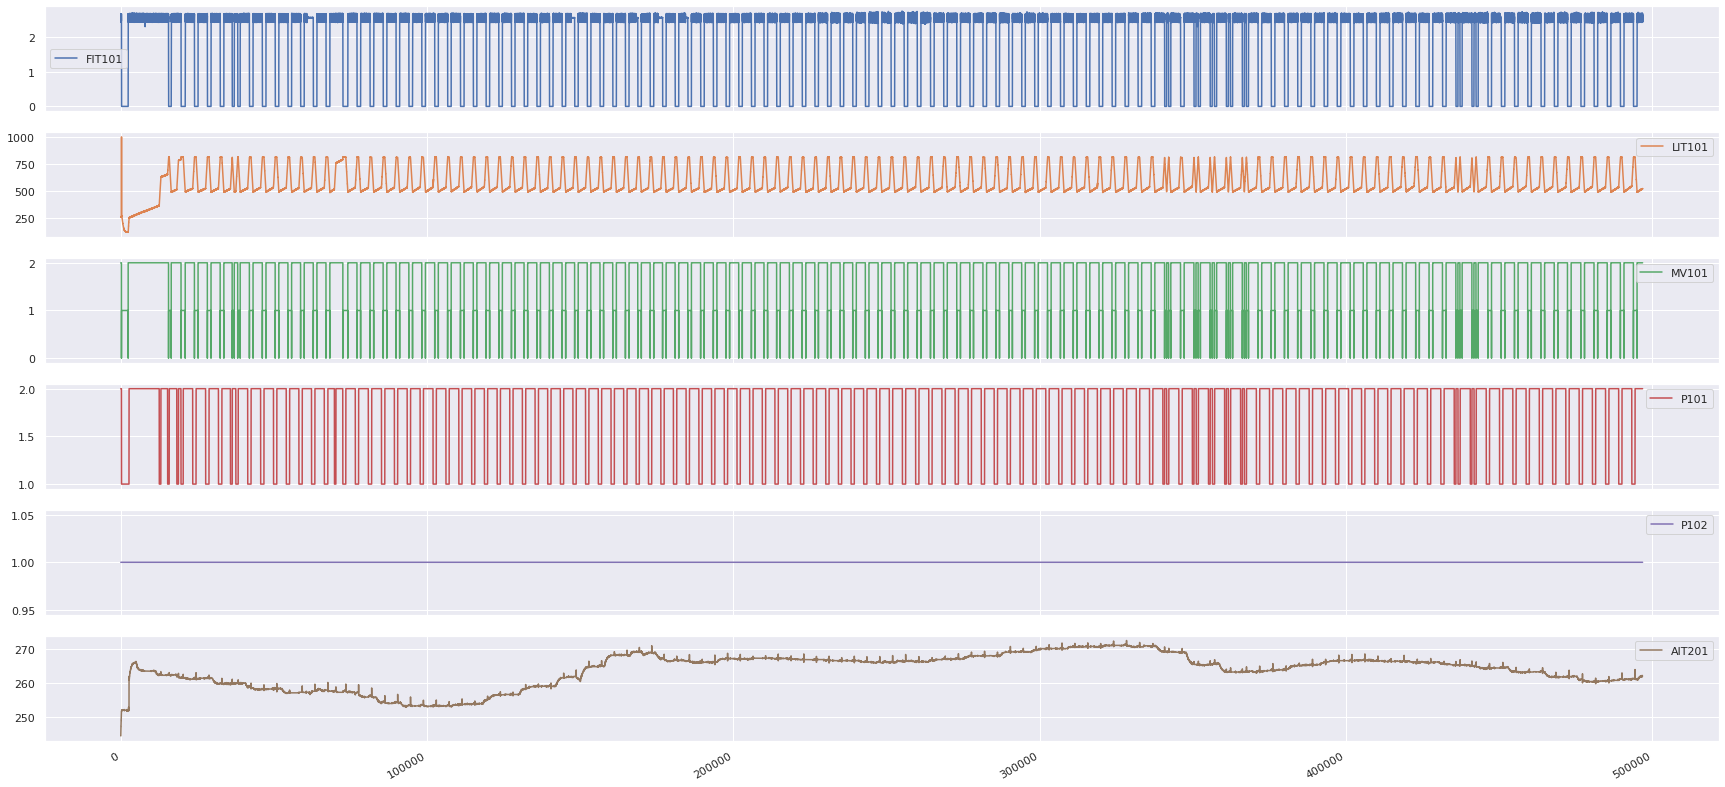

In [ ]:
# Operational Settings
SWAT_Dataset_N.iloc[:,3:9].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6944dfc110>,
      dtype=object)

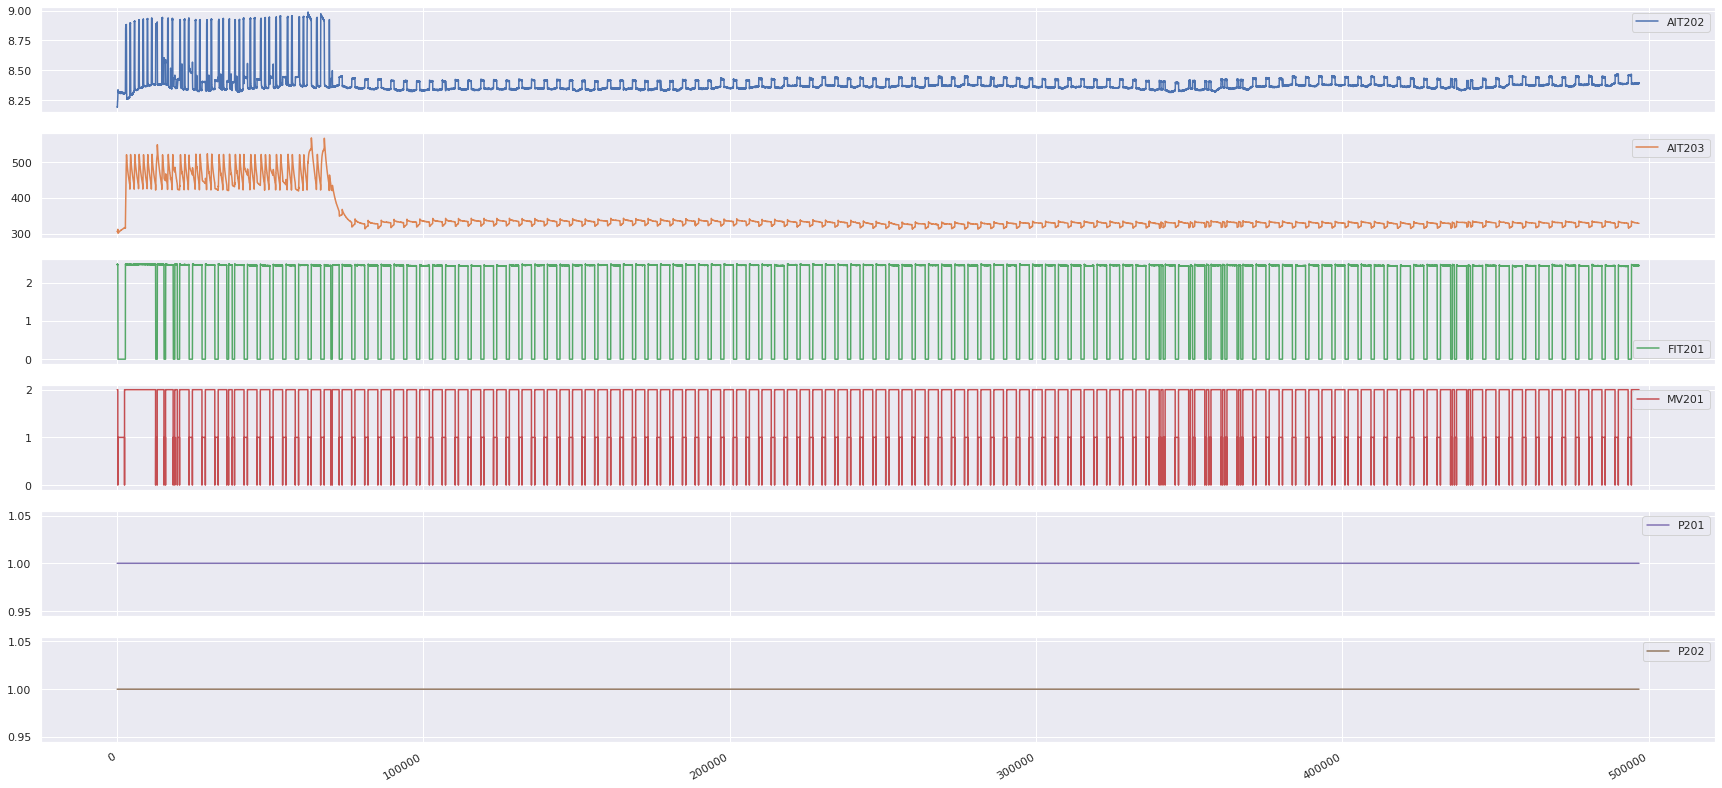

In [ ]:
SWAT_Dataset_N.iloc[:,9:15].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69449624d0>,
      dtype=object)

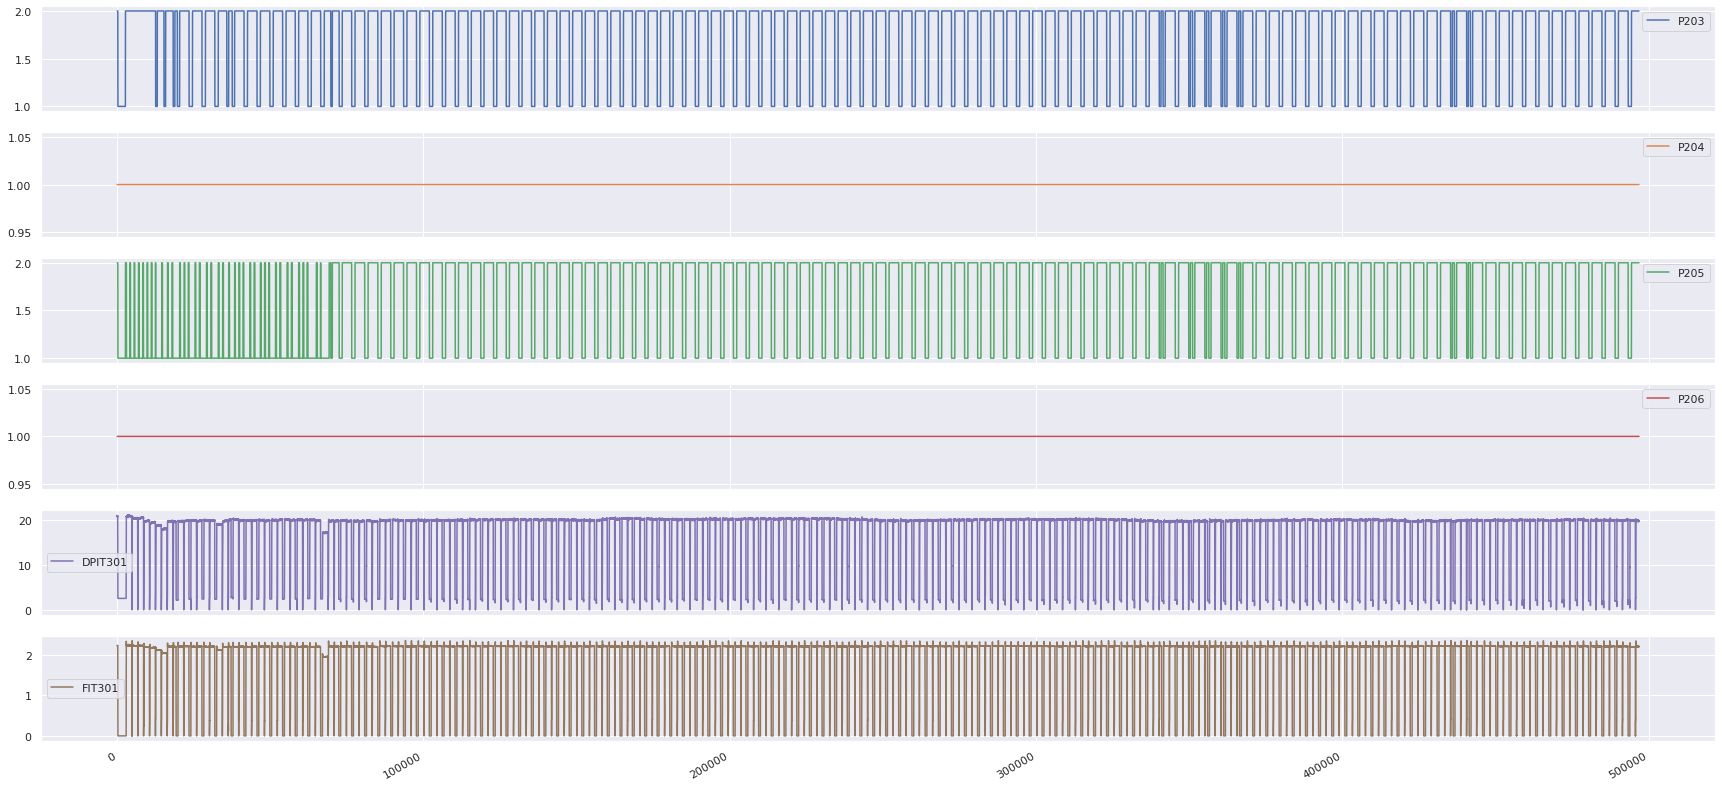

In [ ]:
SWAT_Dataset_N.iloc[:,15:21].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6944f76690>,
      dtype=object)

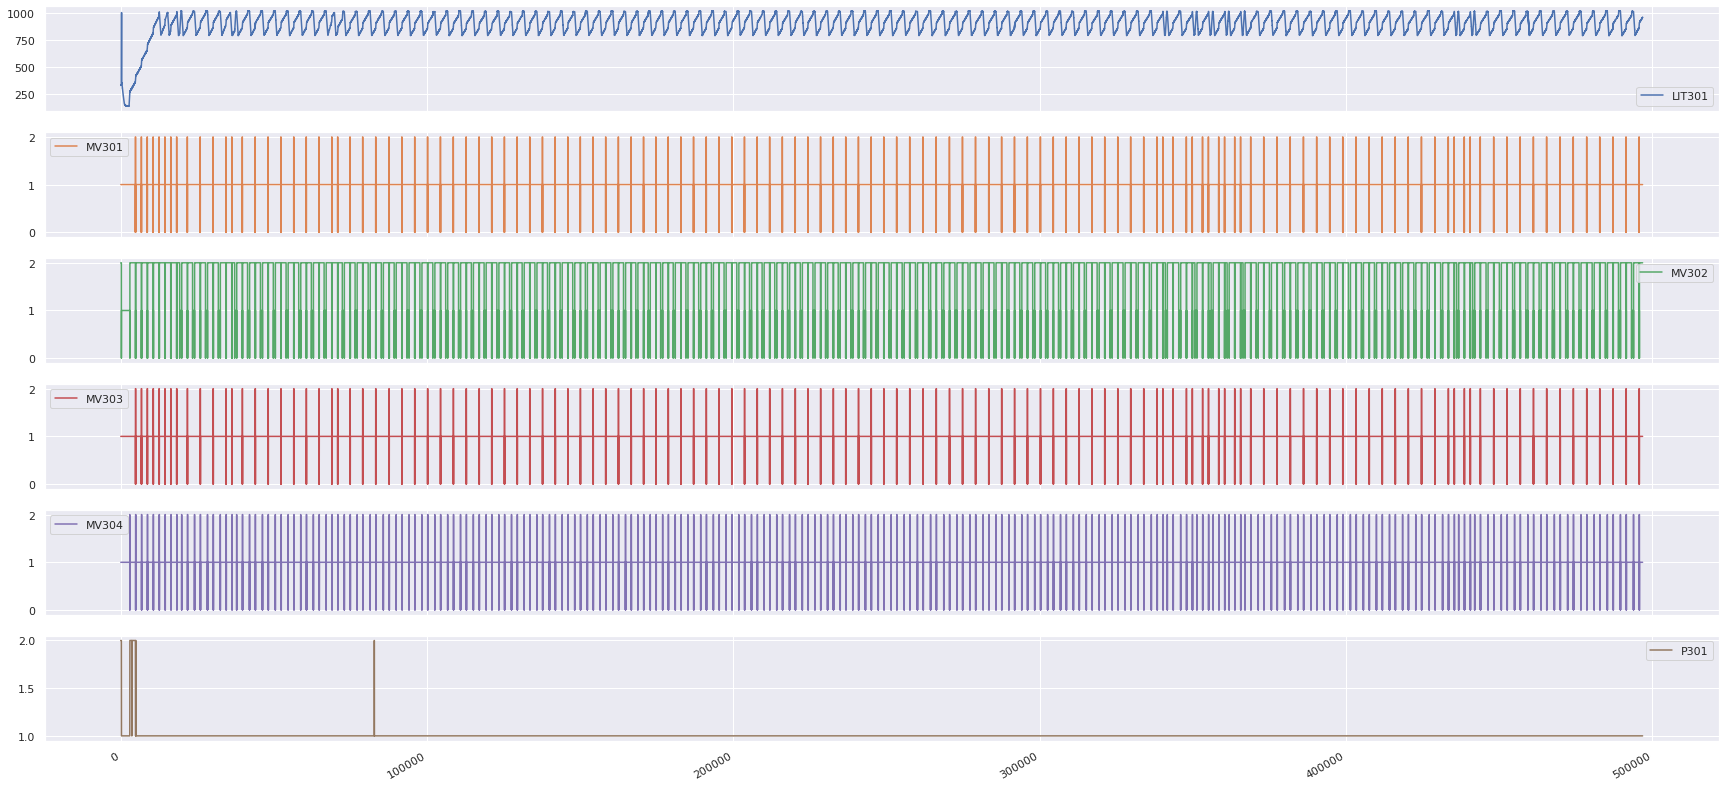

In [ ]:
SWAT_Dataset_N.iloc[:,21:27].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f693ebbb310>,
      dtype=object)

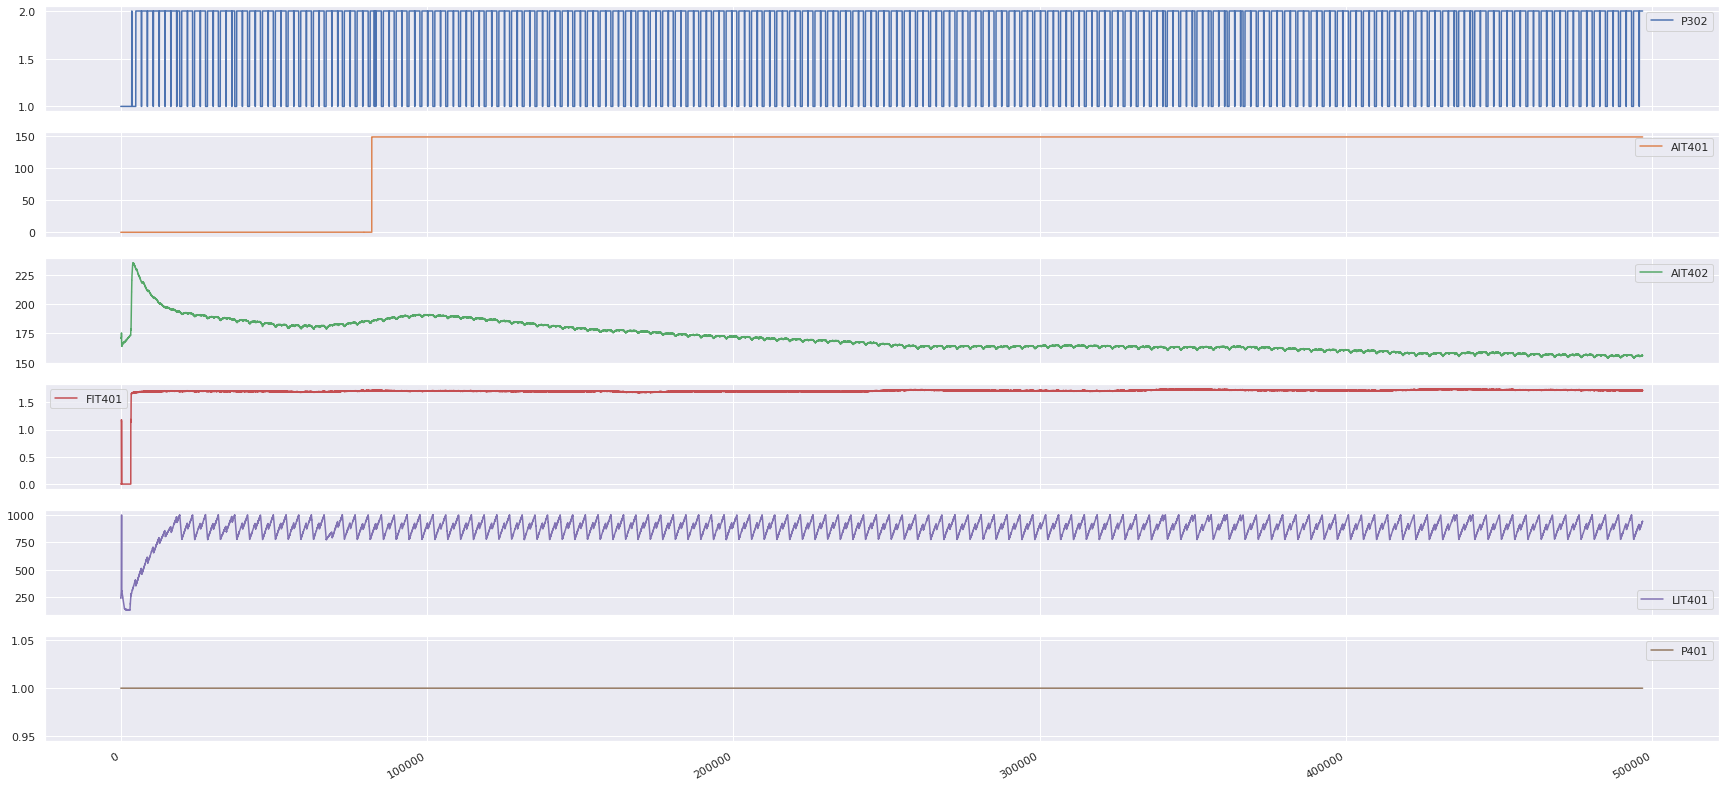

In [ ]:
SWAT_Dataset_N.iloc[:,27:33].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69401c03d0>,
      dtype=object)

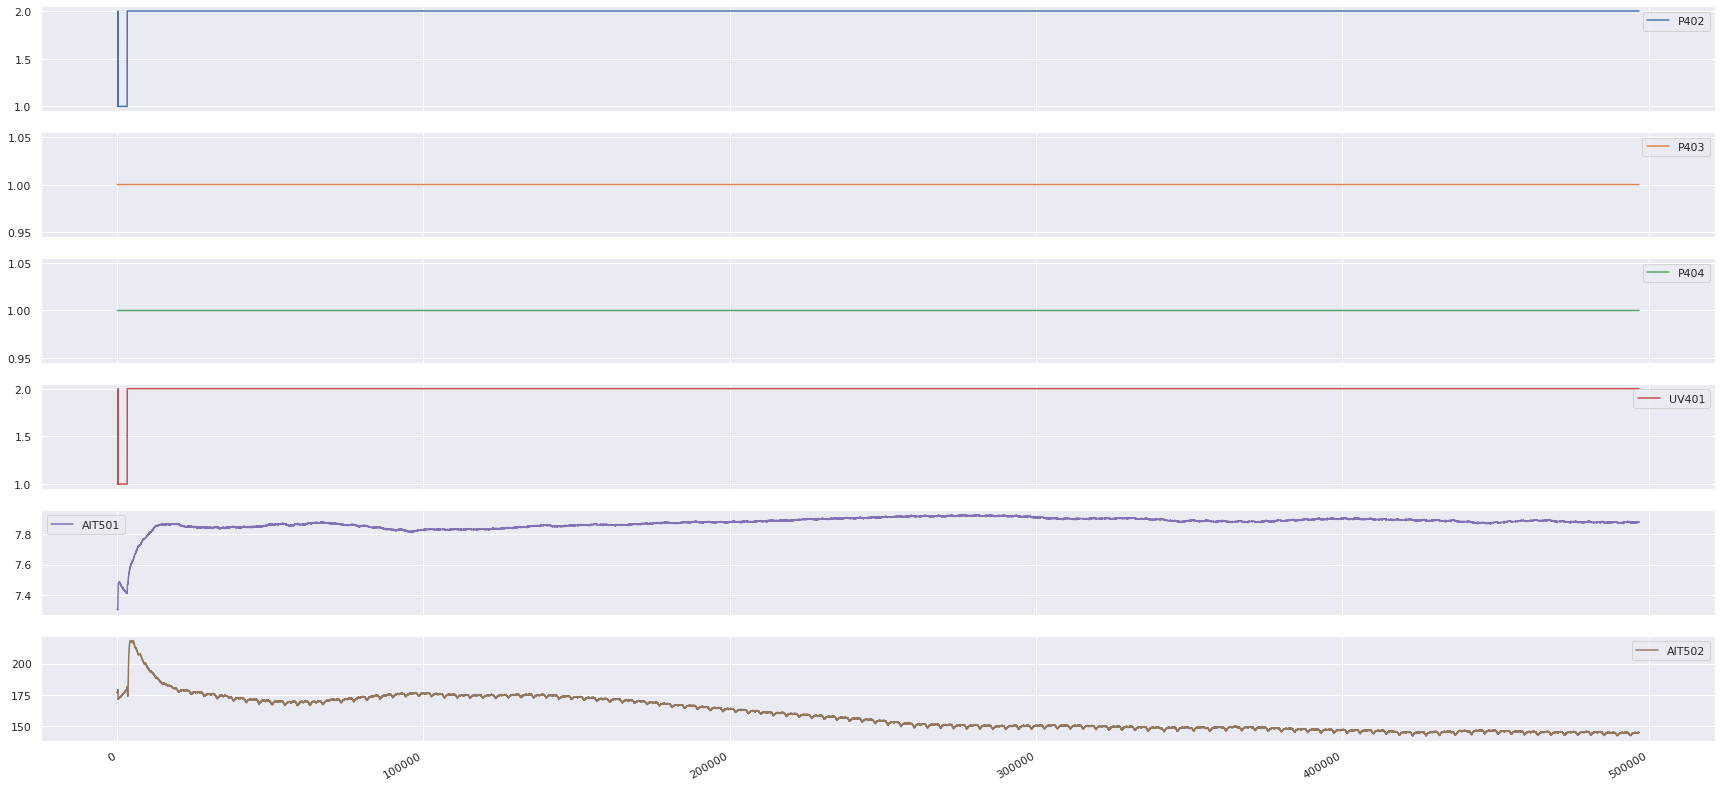

In [ ]:
SWAT_Dataset_N.iloc[:,33:39].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6941abead0>,
      dtype=object)

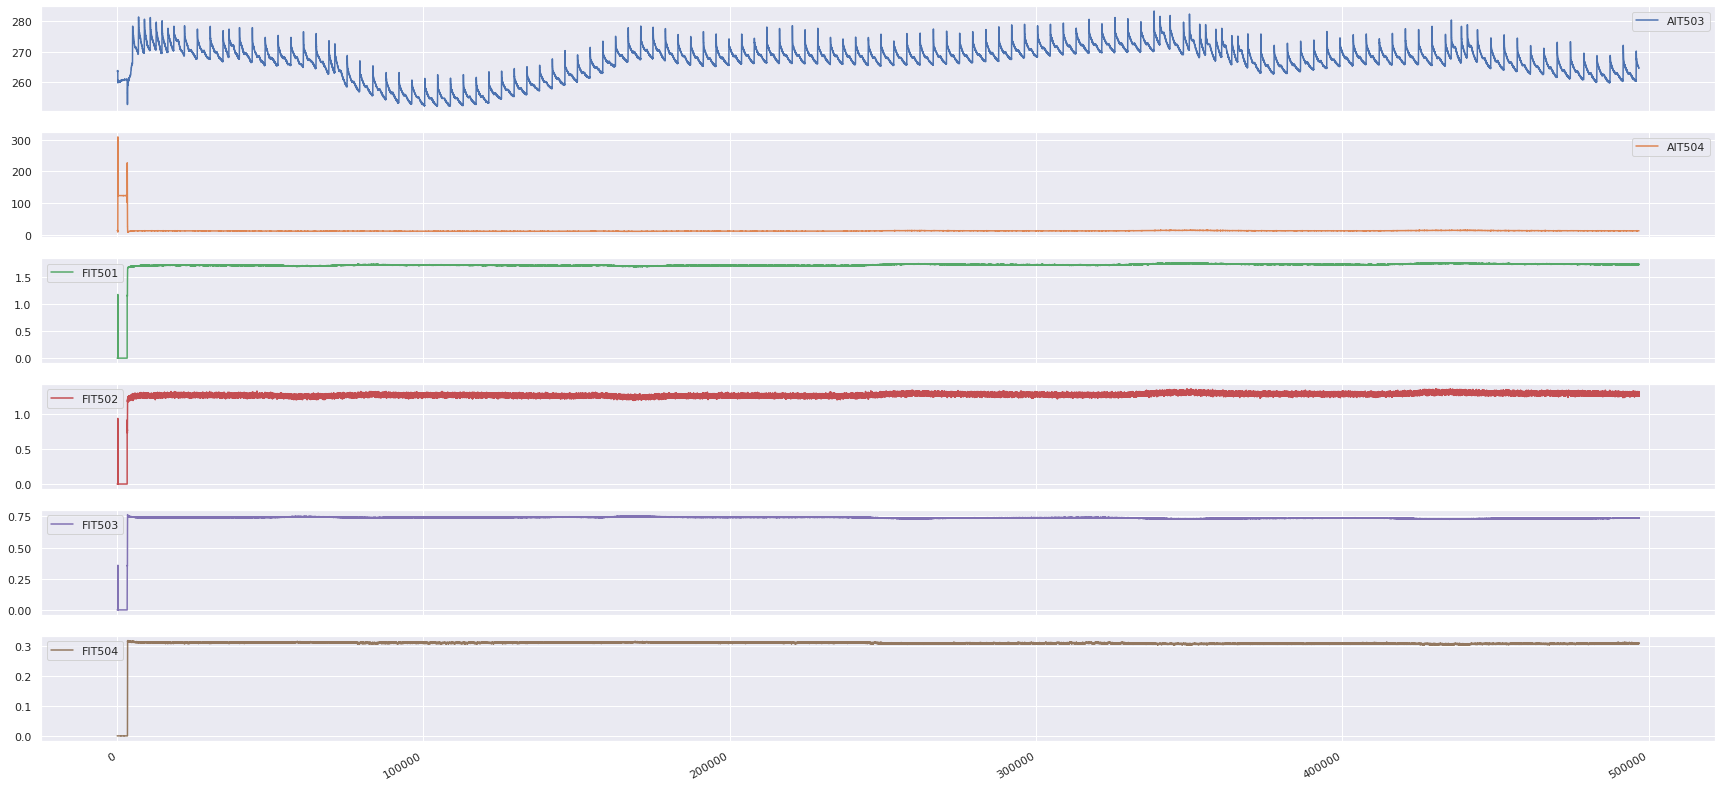

In [ ]:
SWAT_Dataset_N.iloc[:,39:45].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6940ea95d0>,
      dtype=object)

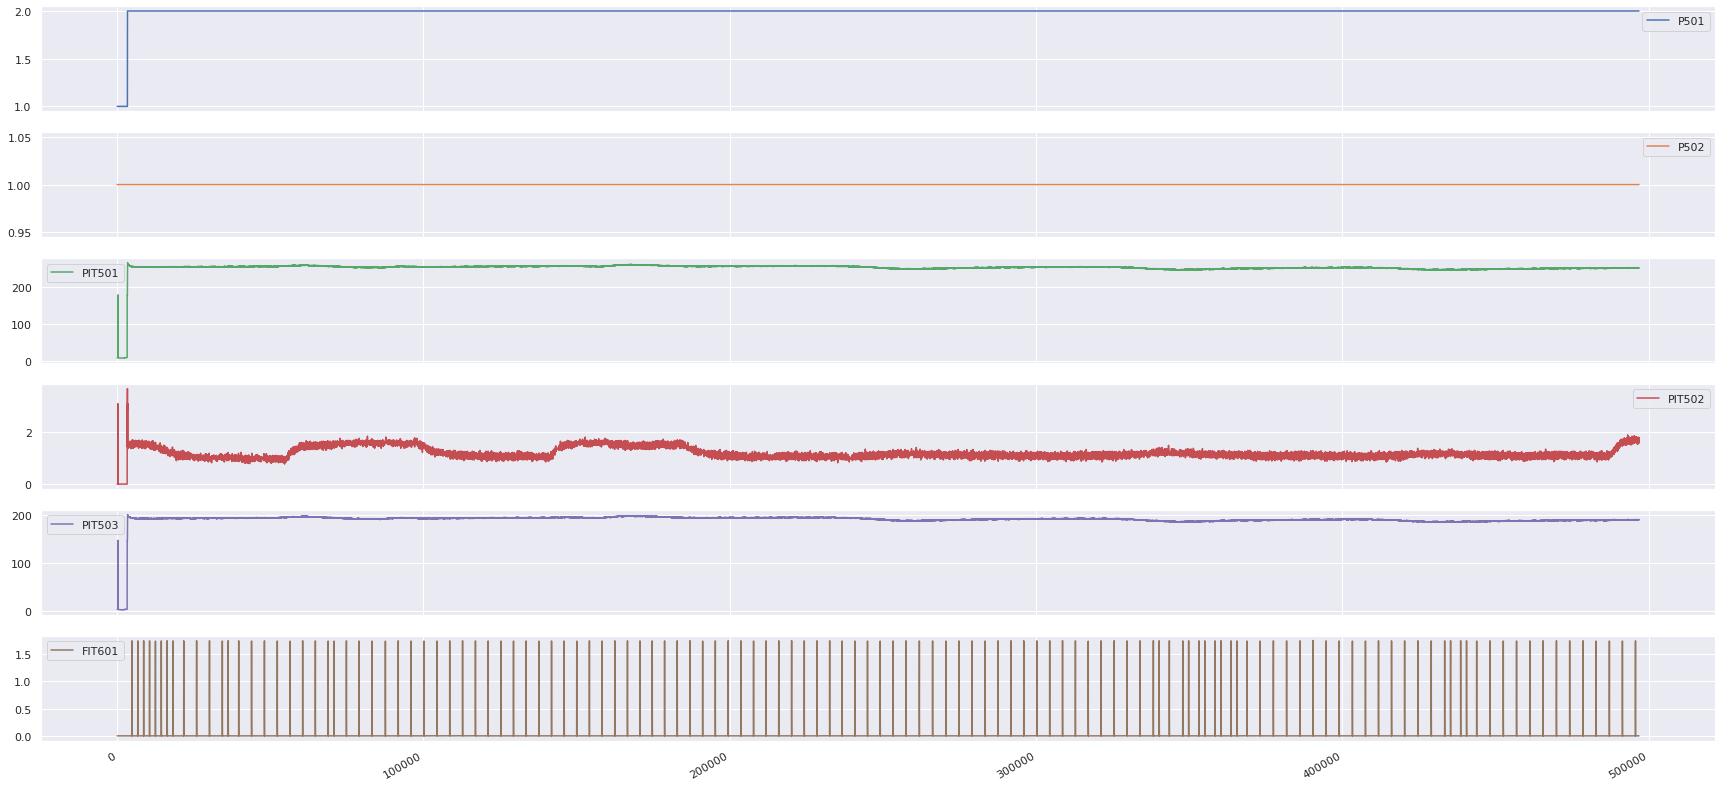

In [ ]:
SWAT_Dataset_N.iloc[:,45:51].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f693bc2a650>,
      dtype=object)

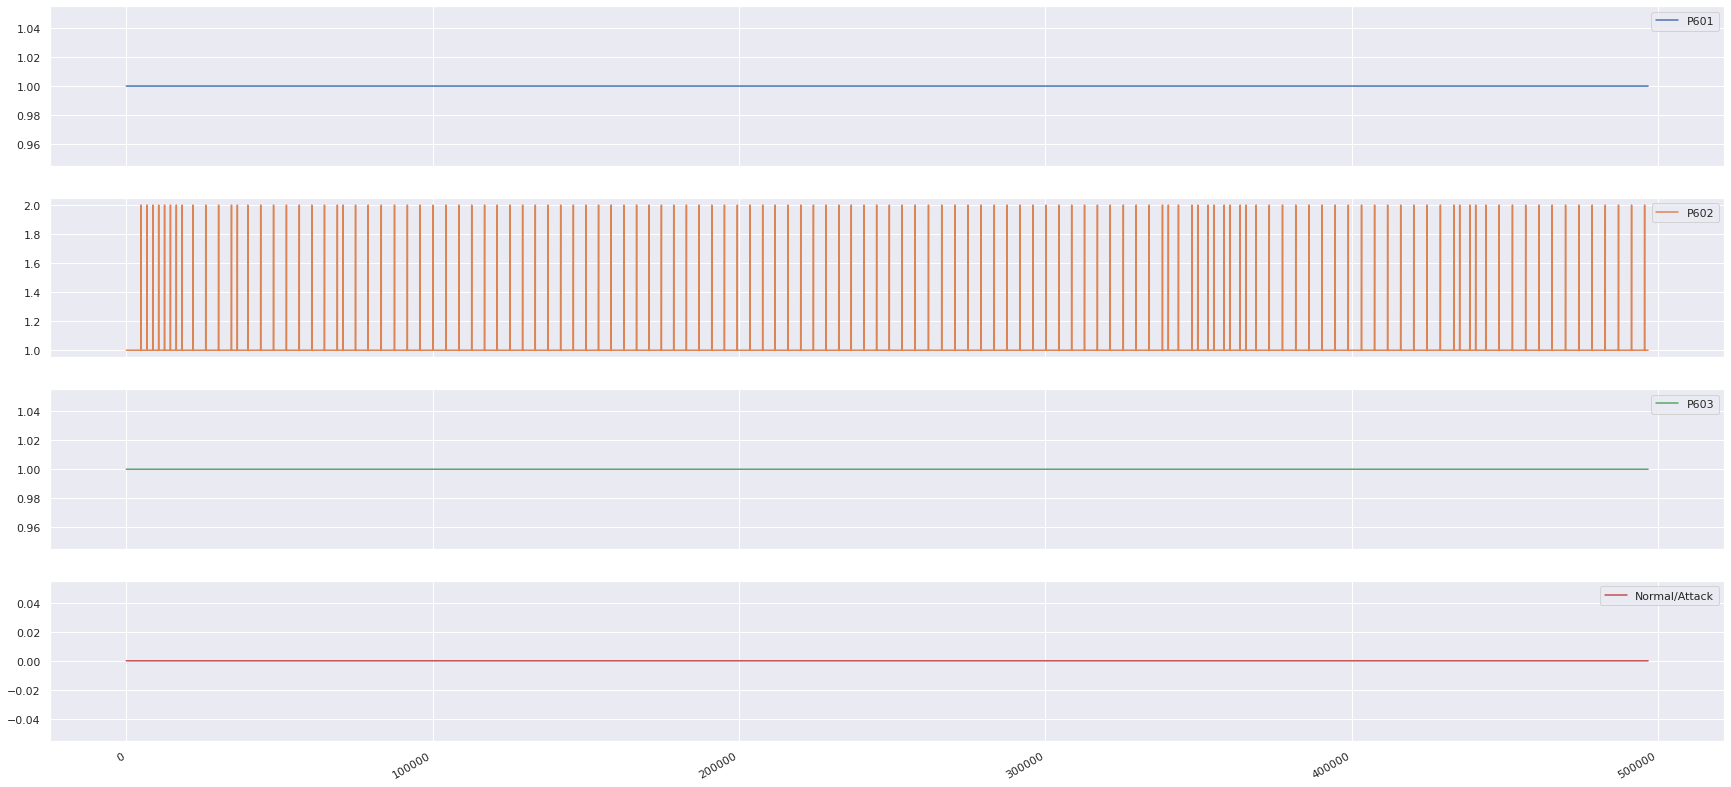

In [ ]:
SWAT_Dataset_N.iloc[:,51:].plot(subplots = True, figsize = (30,15))

## Plant Details 



### The Plant take some time to stabilize thus initial readings (100000) are required to be clipped form the dataset. This dataset will be treated as the training dataset. 



> The dataset contains 11 days of continuous operation: seven days under regular operation (training) and four days under cyber attacks (testing). In the testbed, a total of 41 cyber attacks were deployed, classified into
four different categories:




* Single-stage single-point: cyber attacks that target only one sensor or actuator in exactly one process.
* Single-stage multi-point: cyber attacks that target multiple sensors and/or actuators in only
one process.
* Multi-stage single-point: cyber attacks that target one sensor or actuator in more than one process.
* Multi-stage multi-point: cyber attacks that target multiple sensors and/or actuators in two or
more processes.

The SWaT dataset provides a snapshot every second with the values of the 26 sensors and
25 actuators in the testbed, stored in CSV files.

In [ ]:
SWAT_Dataset_N = SWAT_Dataset_N.iloc[100000:,:]
SWAT_Dataset_N = SWAT_Dataset_N.reset_index(drop=True)
SWAT_Dataset_N

0             Date     Time Period    FIT101  ...  P601  P602  P603  Normal/Attack
0       23/12/2015  7:46:41     PM  2.543958  ...     1     1     1              0
1       23/12/2015  7:46:42     PM  2.527944  ...     1     1     1              0
2       23/12/2015  7:46:43     PM  2.516414  ...     1     1     1              0
3       23/12/2015  7:46:44     PM  2.501041  ...     1     1     1              0
4       23/12/2015  7:46:45     PM  2.483426  ...     1     1     1              0
...            ...      ...    ...       ...  ...   ...   ...   ...            ...
396794  28/12/2015  9:59:55     AM  2.460366  ...     1     1     1              0
396795  28/12/2015  9:59:56     AM  2.448836  ...     1     1     1              0
396796  28/12/2015  9:59:57     AM  2.434744  ...     1     1     1              0
396797  28/12/2015  9:59:58     AM  2.428338  ...     1     1     1              0
396798  28/12/2015  9:59:59     AM  2.427057  ...     1     1     1              0

[396799 rows x 55 columns]

In [ ]:
# Categorical Features
Cat_feat = ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302',
            'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'P501', 'P502', 'P601', 'P602', 'P603']

In [ ]:
SWAT_Dataset_N.iloc[:,3:].describe()

0             FIT101         LIT101  ...      P603  Normal/Attack
count  396799.000000  396799.000000  ...  396799.0       396799.0
mean        1.838996     591.859511  ...       1.0            0.0
std         1.138011     113.590036  ...       0.0            0.0
min         0.000000     486.420200  ...       1.0            0.0
25%         0.000000     509.697100  ...       1.0            0.0
50%         2.489511     526.222500  ...       1.0            0.0
75%         2.591359     675.579200  ...       1.0            0.0
max         2.745092     817.556500  ...       1.0            0.0

[8 rows x 52 columns]

In [ ]:
SWAT_Dataset_N['Normal/Attack'].value_counts()

0    396799
Name: Normal/Attack, dtype: int64

In [ ]:
# Continous features
features_to_scale = [i for i in Headers if i not in Cat_feat]
features_to_scale = features_to_scale[3:27]
features_to_scale

['AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 'DPIT301',
 'FIT301',
 'LIT301',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601']

# Dataset with Attacks

In [ ]:
# Importing Training Dataset
SWAT_Dataset_A = pd.read_excel(swat_dataset_attack)  
SWAT_Dataset_A

Unnamed: 0 Unnamed: 1  ... Unnamed: 51    Unnamed: 52
0                     Timestamp     FIT101  ...        P603  Normal/Attack
1        28/12/2015 10:00:00 AM    2.42706  ...           1         Normal
2        28/12/2015 10:00:01 AM    2.44627  ...           1         Normal
3        28/12/2015 10:00:02 AM    2.48919  ...           1         Normal
4        28/12/2015 10:00:03 AM    2.53435  ...           1         Normal
...                         ...        ...  ...         ...            ...
449915      2/1/2016 2:59:55 PM    2.55997  ...           1         Normal
449916      2/1/2016 2:59:56 PM    2.54908  ...           1         Normal
449917      2/1/2016 2:59:57 PM    2.53147  ...           1         Normal
449918      2/1/2016 2:59:58 PM    2.52122  ...           1         Normal
449919      2/1/2016 2:59:59 PM    2.50168  ...           1         Normal

[449920 rows x 53 columns]

In [ ]:
# Rename Header values from Row 0
SWAT_Dataset_A.columns = SWAT_Dataset_A.iloc[0]

# Drop 0 Row
SWAT_Dataset_A = SWAT_Dataset_A.drop(SWAT_Dataset_A.index[[0,1]])

# Print Dataframe
SWAT_Dataset_A

0                     Timestamp   FIT101   LIT101  ... P602 P603 Normal/Attack
2        28/12/2015 10:00:01 AM  2.44627  522.886  ...    1    1        Normal
3        28/12/2015 10:00:02 AM  2.48919  522.847  ...    1    1        Normal
4        28/12/2015 10:00:03 AM  2.53435  522.965  ...    1    1        Normal
5        28/12/2015 10:00:04 AM  2.56926  523.475  ...    1    1        Normal
6        28/12/2015 10:00:05 AM  2.60929  523.867  ...    1    1        Normal
...                         ...      ...      ...  ...  ...  ...           ...
449915      2/1/2016 2:59:55 PM  2.55997  519.549  ...    1    1        Normal
449916      2/1/2016 2:59:56 PM  2.54908  520.413  ...    1    1        Normal
449917      2/1/2016 2:59:57 PM  2.53147  520.688  ...    1    1        Normal
449918      2/1/2016 2:59:58 PM  2.52122  520.727  ...    1    1        Normal
449919      2/1/2016 2:59:59 PM  2.50168   521.12  ...    1    1        Normal

[449918 rows x 53 columns]

In [ ]:
SWAT_Dataset_A.isnull().values.any()

False

In [ ]:
Timestamp = SWAT_Dataset_A[' Timestamp'].str.split(' ', expand=True)
SWAT_Dataset_A['Date'] = Timestamp[1]
SWAT_Dataset_A['Time'] = Timestamp[2]
SWAT_Dataset_A['Period'] = Timestamp[3]

SWAT_Dataset_A = pd.concat([SWAT_Dataset_A.iloc[:,-3:], SWAT_Dataset_A.iloc[:,1:-3]], axis = 1)
SWAT_Dataset_A = SWAT_Dataset_A.reset_index(drop=True)
SWAT_Dataset_A

0             Date      Time Period   FIT101  ... P601 P602 P603 Normal/Attack
0       28/12/2015  10:00:01     AM  2.44627  ...    1    1    1        Normal
1       28/12/2015  10:00:02     AM  2.48919  ...    1    1    1        Normal
2       28/12/2015  10:00:03     AM  2.53435  ...    1    1    1        Normal
3       28/12/2015  10:00:04     AM  2.56926  ...    1    1    1        Normal
4       28/12/2015  10:00:05     AM  2.60929  ...    1    1    1        Normal
...            ...       ...    ...      ...  ...  ...  ...  ...           ...
449913    2/1/2016   2:59:55     PM  2.55997  ...    1    1    1        Normal
449914    2/1/2016   2:59:56     PM  2.54908  ...    1    1    1        Normal
449915    2/1/2016   2:59:57     PM  2.53147  ...    1    1    1        Normal
449916    2/1/2016   2:59:58     PM  2.52122  ...    1    1    1        Normal
449917    2/1/2016   2:59:59     PM  2.50168  ...    1    1    1        Normal

[449918 rows x 55 columns]

In [ ]:
# Replace Values: Normal with 0 
SWAT_Dataset_A = SWAT_Dataset_A.replace(to_replace = "Normal",
                 value = 0)

# Replace Values: Attack with 1
SWAT_Dataset_A = SWAT_Dataset_A.replace(to_replace = "Attack",
                 value = 1)

# Replace Values: Attack with 1 (Labelling error)
SWAT_Dataset_A = SWAT_Dataset_A.replace(to_replace = "A ttack",
                 value = 1)


SWAT_Dataset_A

0             Date      Time Period    FIT101  ...  P601  P602  P603  Normal/Attack
0       28/12/2015  10:00:01     AM  2.446274  ...     1     1     1              0
1       28/12/2015  10:00:02     AM  2.489191  ...     1     1     1              0
2       28/12/2015  10:00:03     AM  2.534350  ...     1     1     1              0
3       28/12/2015  10:00:04     AM  2.569260  ...     1     1     1              0
4       28/12/2015  10:00:05     AM  2.609294  ...     1     1     1              0
...            ...       ...    ...       ...  ...   ...   ...   ...            ...
449913    2/1/2016   2:59:55     PM  2.559972  ...     1     1     1              0
449914    2/1/2016   2:59:56     PM  2.549082  ...     1     1     1              0
449915    2/1/2016   2:59:57     PM  2.531467  ...     1     1     1              0
449916    2/1/2016   2:59:58     PM  2.521218  ...     1     1     1              0
449917    2/1/2016   2:59:59     PM  2.501681  ...     1     1     1              0

[449918 rows x 55 columns]

## Initial Data Analysis and Visualization

In [ ]:
SWAT_Dataset_A.iloc[:,3:].describe()

0             FIT101         LIT101  ...      P603  Normal/Attack
count  449918.000000  449918.000000  ...  449918.0  449918.000000
mean        1.714345     607.020154  ...       1.0       0.121402
std         1.191717     125.303080  ...       0.0       0.326594
min         0.000000     189.826300  ...       1.0       0.000000
25%         0.000000     510.011100  ...       1.0       0.000000
50%         2.477020     530.422500  ...       1.0       0.000000
75%         2.577907     727.432100  ...       1.0       0.000000
max         2.760145     925.032300  ...       1.0       1.000000

[8 rows x 52 columns]

In [ ]:
SWAT_Dataset_A['Normal/Attack'].unique()

array([0, 1])

In [ ]:
SWAT_Dataset_A['Normal/Attack'].value_counts()

0    395297
1     54621
Name: Normal/Attack, dtype: int64


> 54621 timestamps are counted under attack




### Plot the Sensor/Setting Values to Observe Trends in Data (Pre Processing)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f693a93fe10>,
      dtype=object)

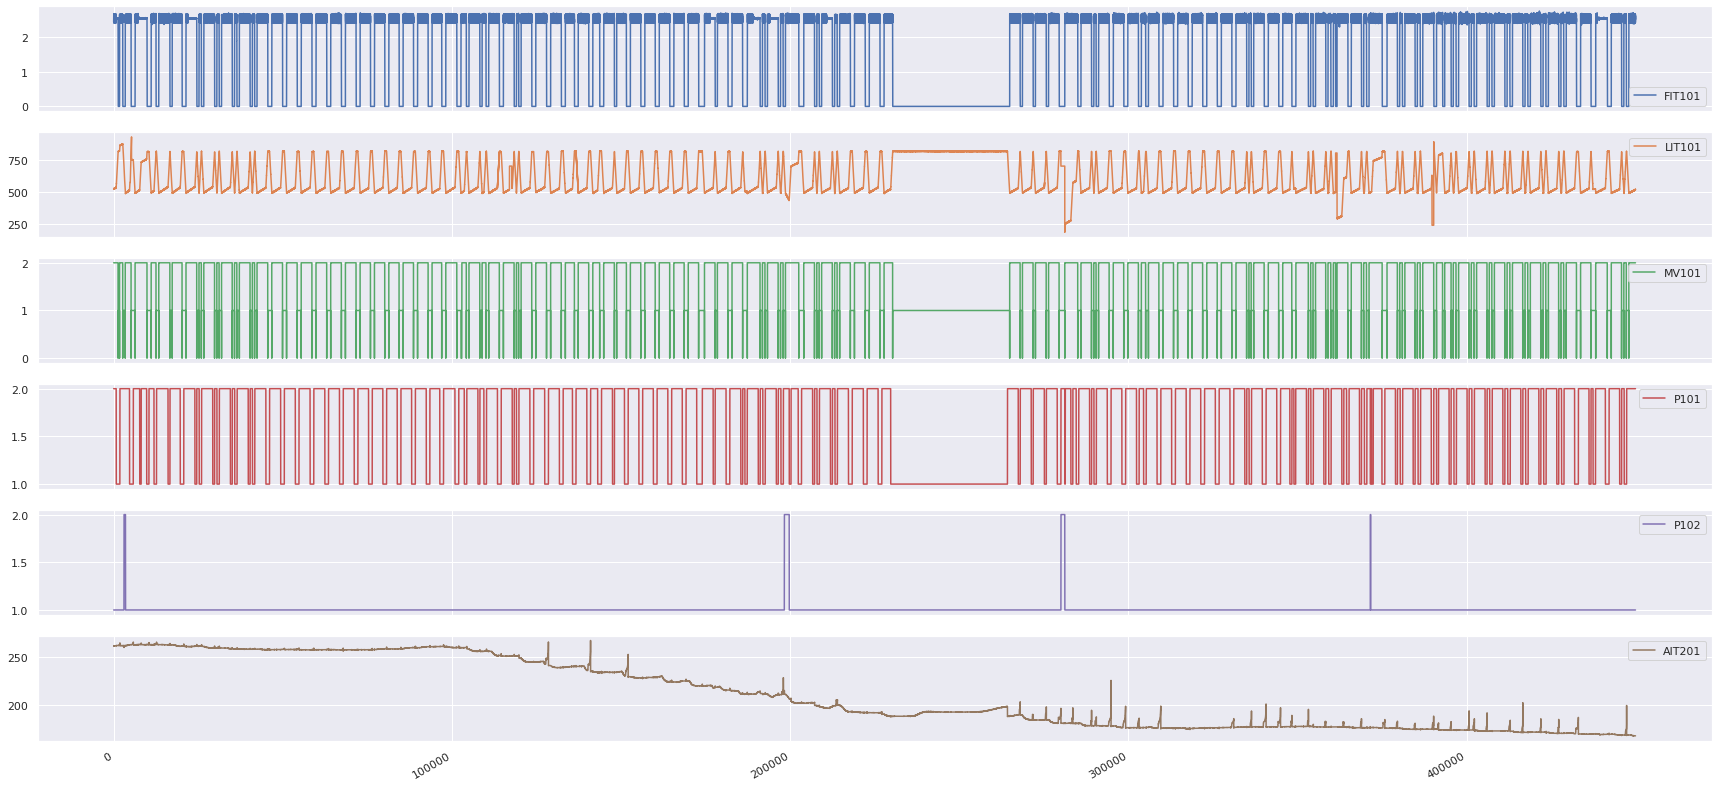

In [ ]:
# Operational Settings
SWAT_Dataset_A.iloc[:,3:9].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f691fe4d790>,
      dtype=object)

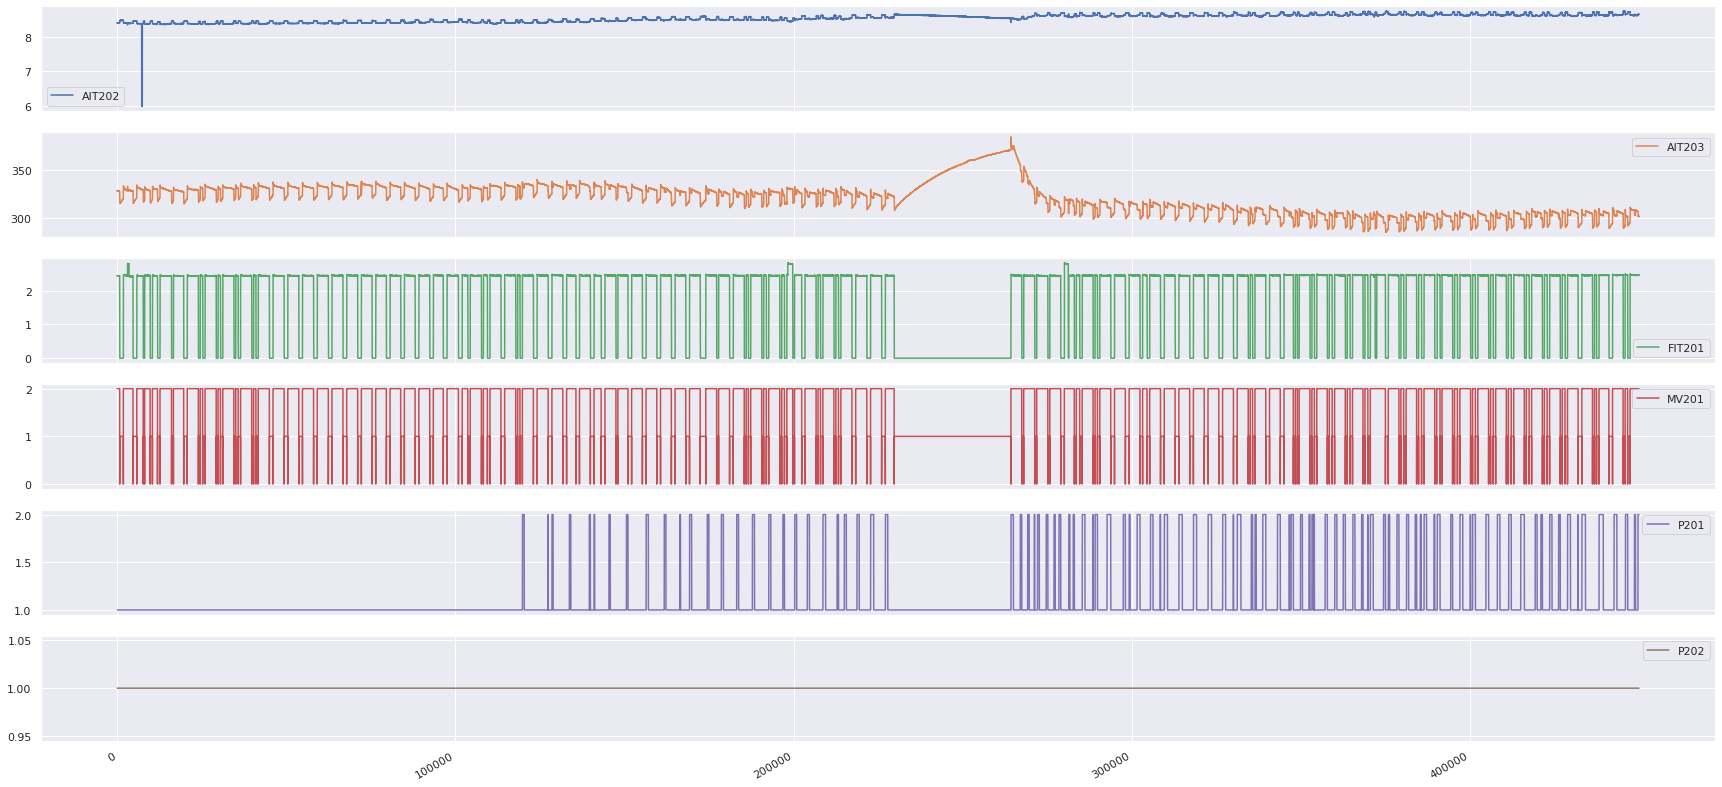

In [ ]:
SWAT_Dataset_A.iloc[:,9:15].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f693c638450>,
      dtype=object)

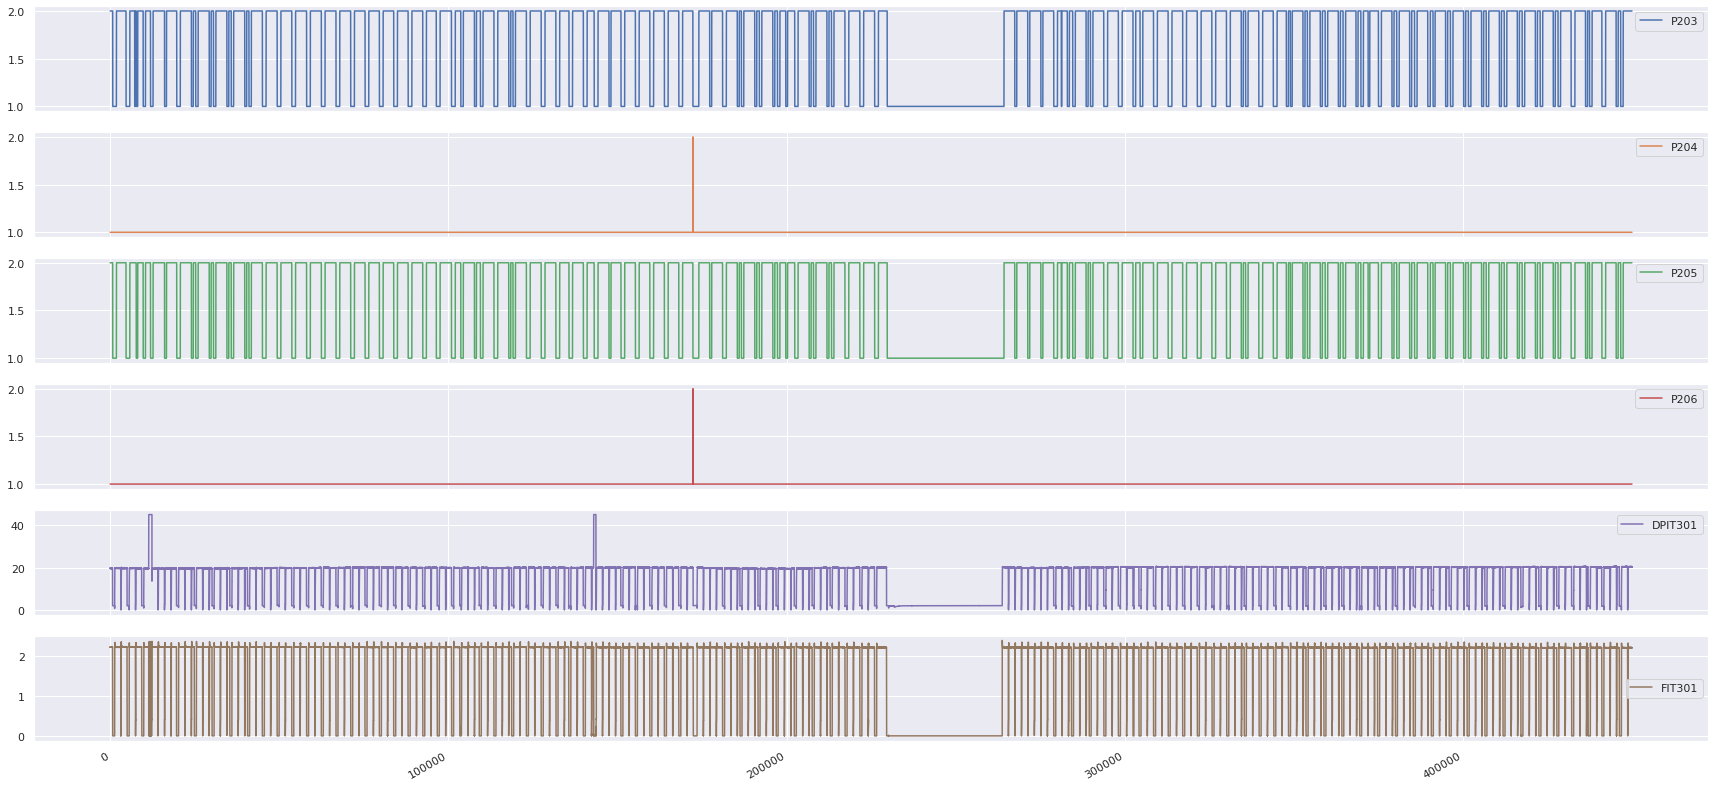

In [ ]:
SWAT_Dataset_A.iloc[:,15:21].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68fd37e8d0>,
      dtype=object)

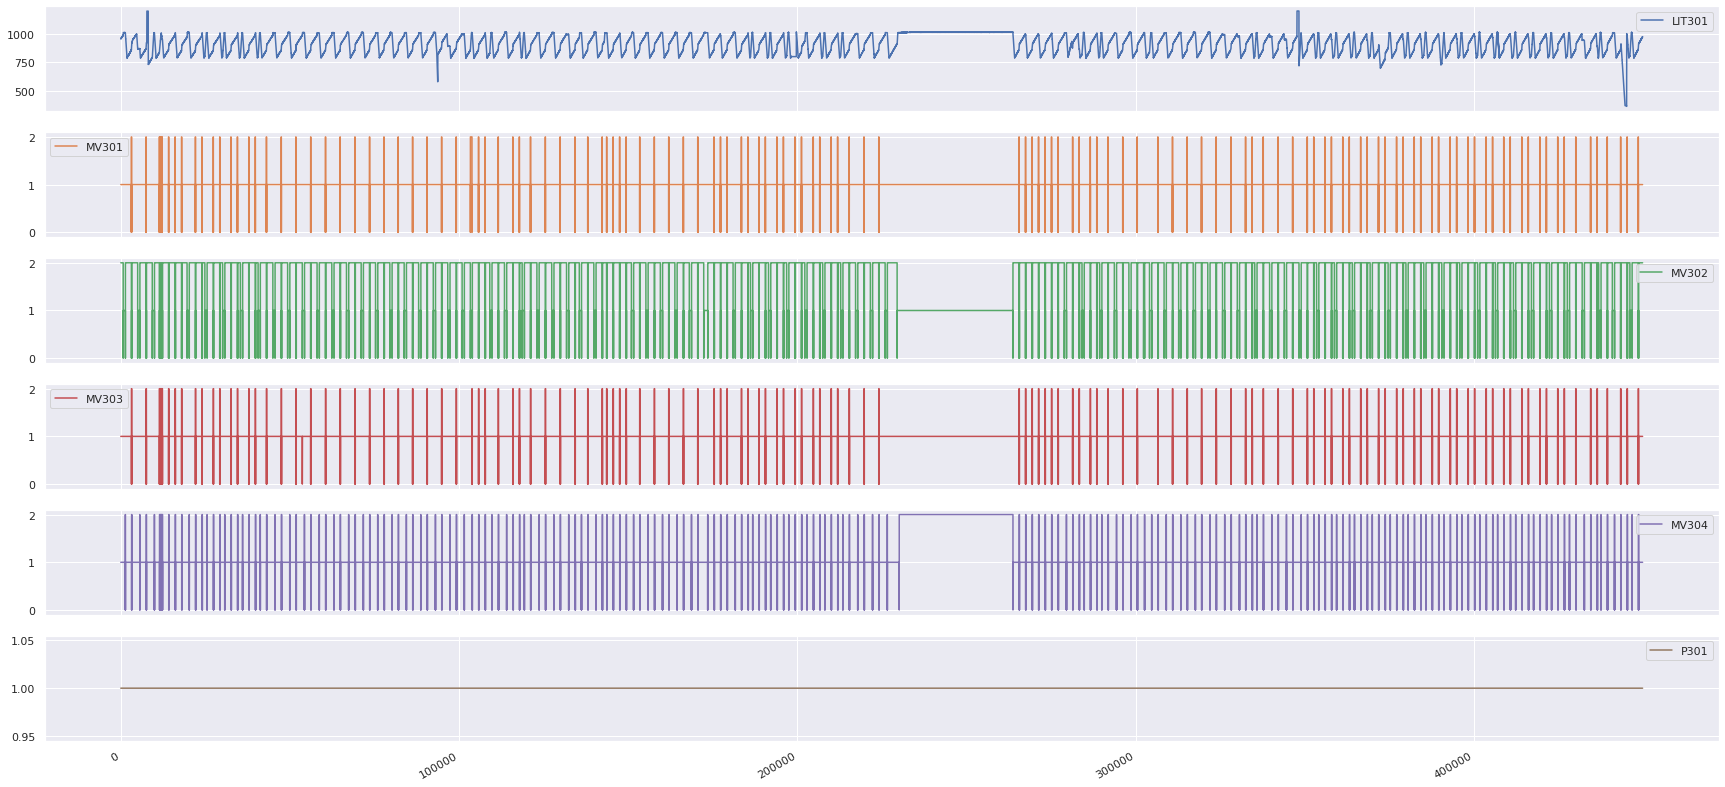

In [ ]:
SWAT_Dataset_A.iloc[:,21:27].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69298e6b50>,
      dtype=object)

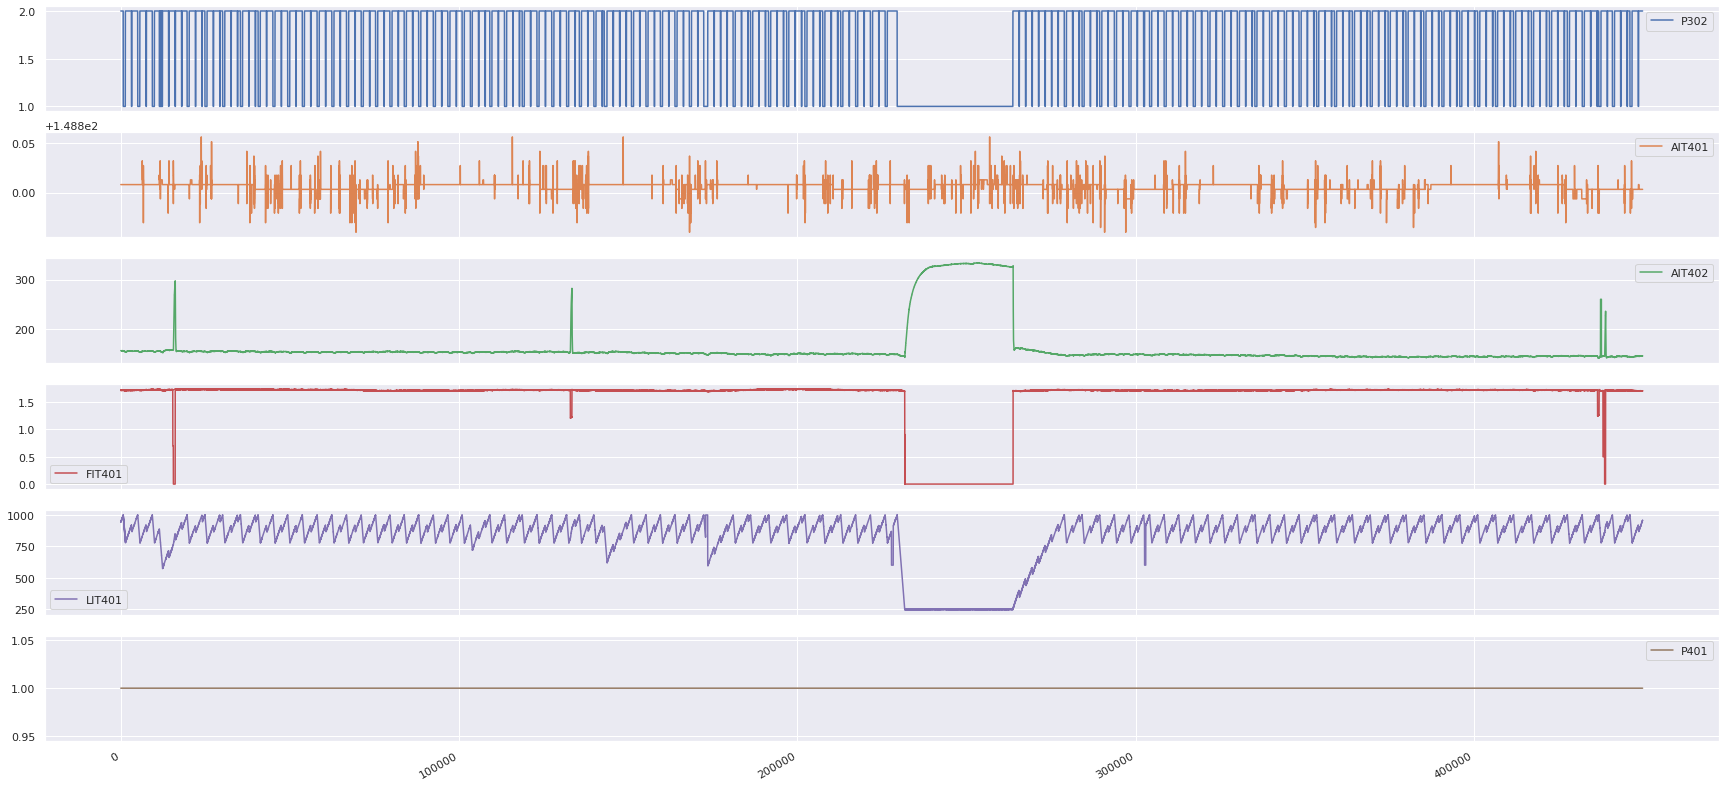

In [ ]:
SWAT_Dataset_A.iloc[:,27:33].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f691fa52d90>,
      dtype=object)

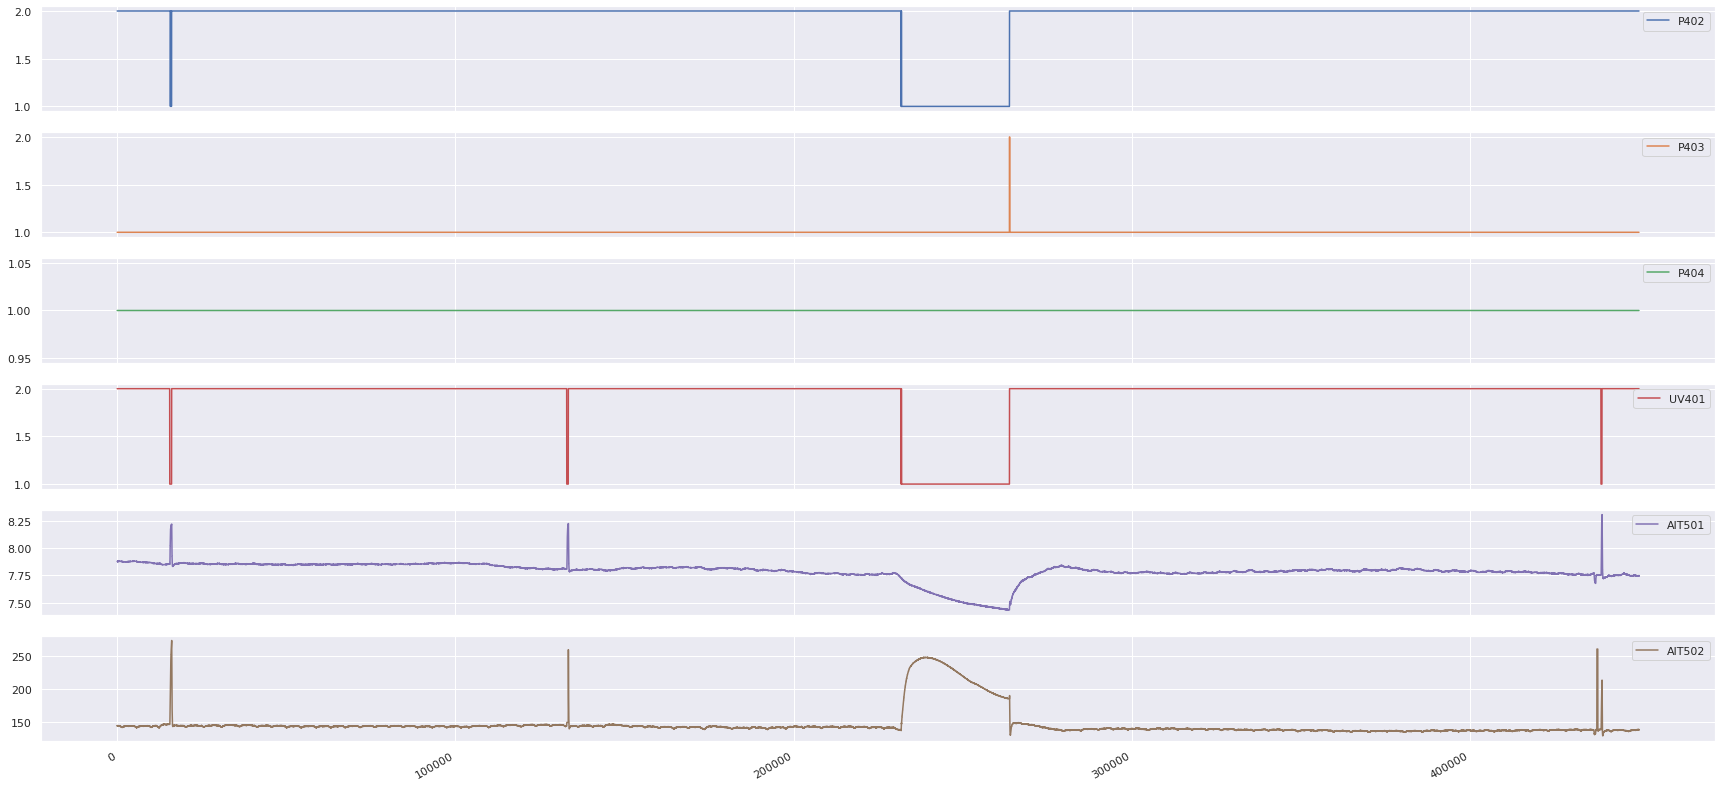

In [ ]:
SWAT_Dataset_A.iloc[:,33:39].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68ebeecc50>,
      dtype=object)

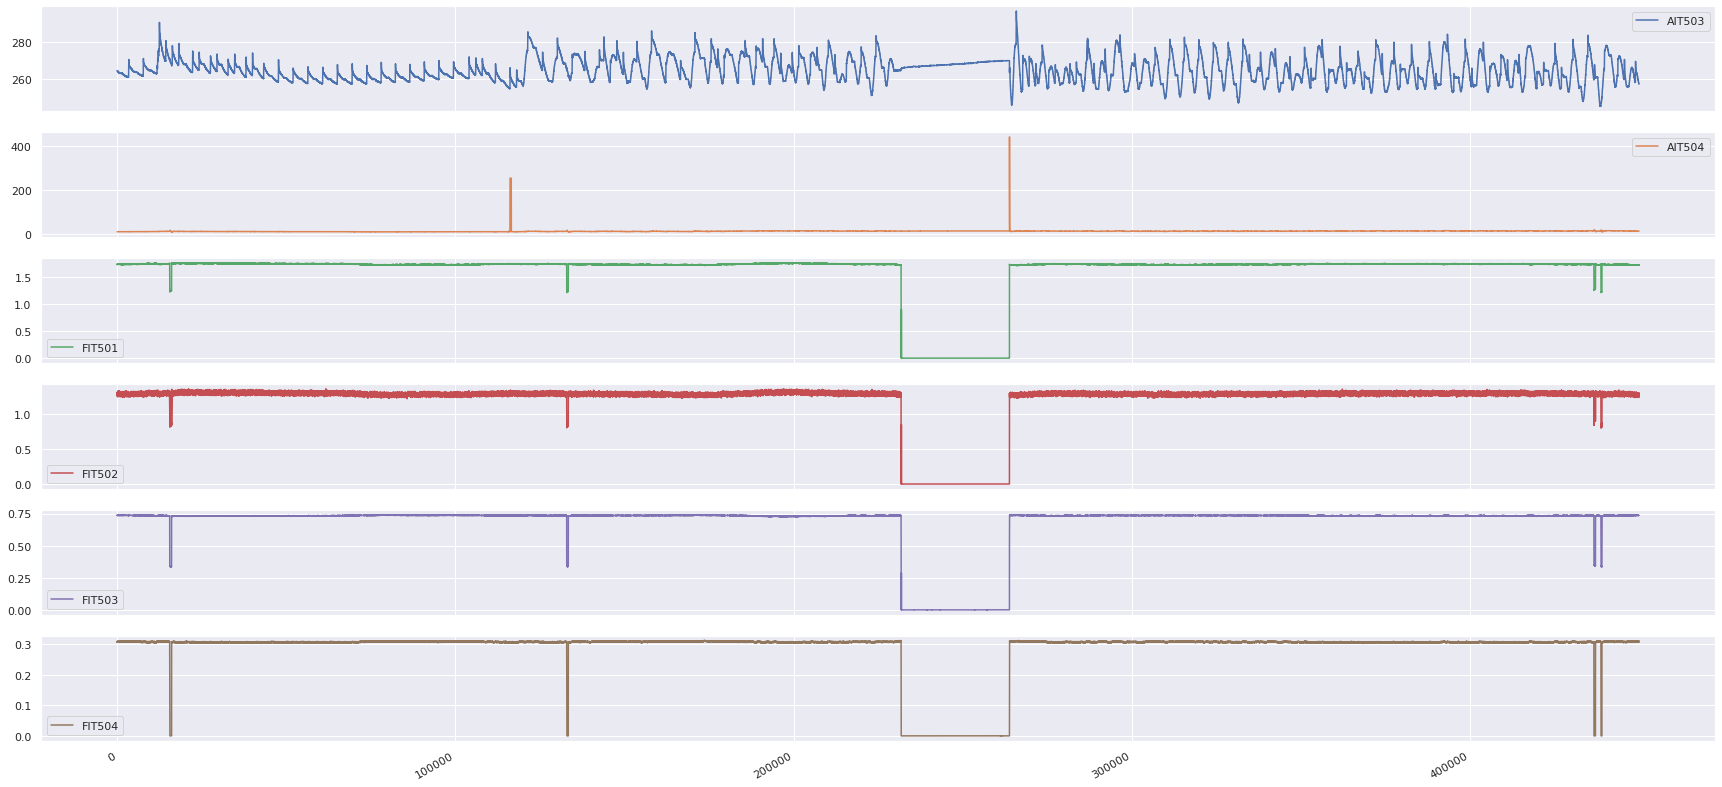

In [ ]:
SWAT_Dataset_A.iloc[:,39:45].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68eba2a810>,
      dtype=object)

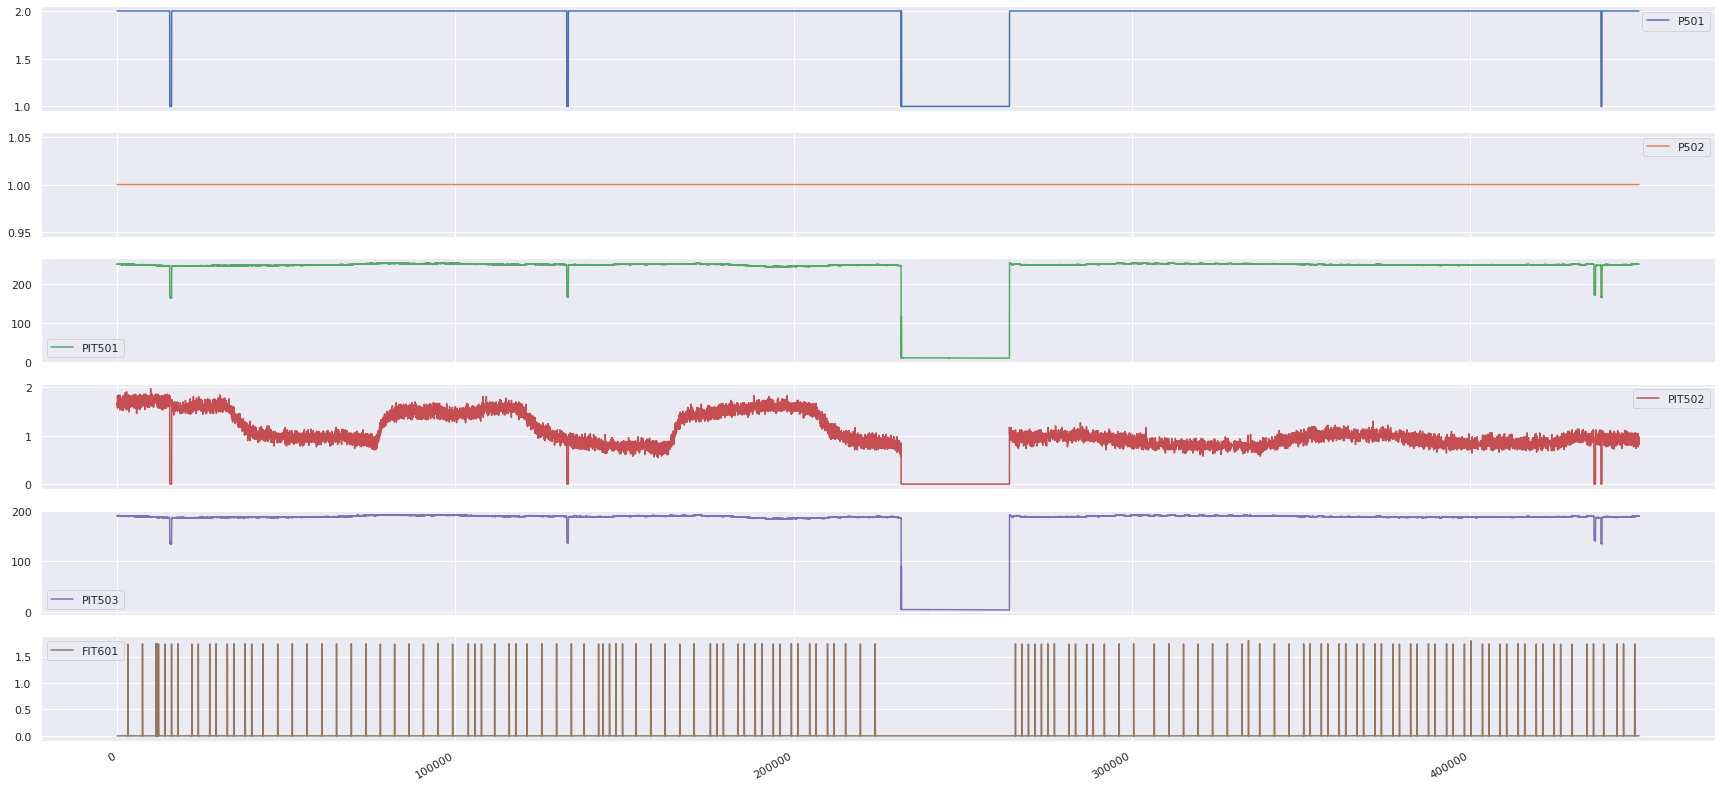

In [ ]:
SWAT_Dataset_A.iloc[:,45:51].plot(subplots = True, figsize = (30,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6901968910>,
      dtype=object)

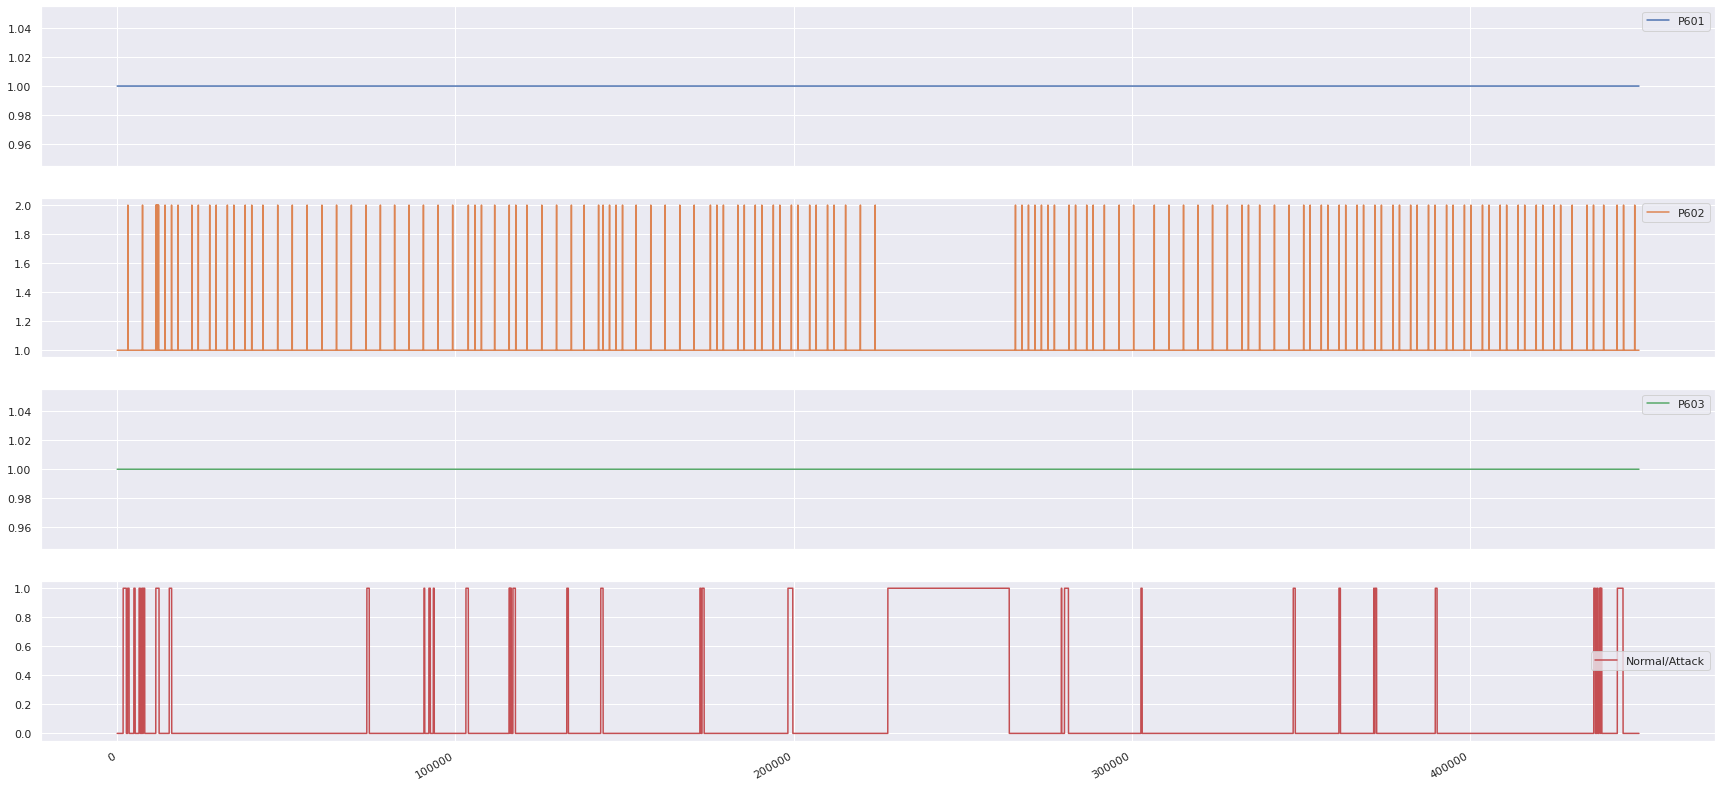

In [ ]:
SWAT_Dataset_A.iloc[:,51:].plot(subplots = True, figsize = (30,15))

# Processes related to Stage 1

In [ ]:
P1 = ['Date', 'Time','Period', 'MV101', 'P101', 'P102', 'LIT101', 'FIT101', 'Normal/Attack']
columns_to_drop = [i for i in Headers if i not in P1][1:]

# Add Temporal Features

P1_Normal = SWAT_Dataset_N.drop(columns_to_drop, axis = 1)
P1_Normal['Time'] = pd.to_datetime(P1_Normal['Time'])
P1_Normal['hourstamp'] = pd.to_datetime(P1_Normal['Time']).dt.hour
P1_Normal['minutes'] = pd.to_datetime(P1_Normal['Time']).dt.minute

P1_Attack = SWAT_Dataset_A.drop(columns_to_drop, axis = 1)
P1_Attack['Time'] = pd.to_datetime(P1_Attack['Time'])
P1_Attack['hourstamp'] = pd.to_datetime(P1_Attack['Time']).dt.hour
P1_Attack['minutes'] = pd.to_datetime(P1_Attack['Time']).dt.minute

In [ ]:
P1_Normal

0             Date                Time  ... hourstamp  minutes
0       23/12/2015 2021-07-10 07:46:41  ...         7       46
1       23/12/2015 2021-07-10 07:46:42  ...         7       46
2       23/12/2015 2021-07-10 07:46:43  ...         7       46
3       23/12/2015 2021-07-10 07:46:44  ...         7       46
4       23/12/2015 2021-07-10 07:46:45  ...         7       46
...            ...                 ...  ...       ...      ...
396794  28/12/2015 2021-07-10 09:59:55  ...         9       59
396795  28/12/2015 2021-07-10 09:59:56  ...         9       59
396796  28/12/2015 2021-07-10 09:59:57  ...         9       59
396797  28/12/2015 2021-07-10 09:59:58  ...         9       59
396798  28/12/2015 2021-07-10 09:59:59  ...         9       59

[396799 rows x 11 columns]

In [ ]:
P1_Attack

0             Date                Time  ... hourstamp  minutes
0       28/12/2015 2021-07-10 10:00:01  ...        10        0
1       28/12/2015 2021-07-10 10:00:02  ...        10        0
2       28/12/2015 2021-07-10 10:00:03  ...        10        0
3       28/12/2015 2021-07-10 10:00:04  ...        10        0
4       28/12/2015 2021-07-10 10:00:05  ...        10        0
...            ...                 ...  ...       ...      ...
449913    2/1/2016 2021-07-10 02:59:55  ...         2       59
449914    2/1/2016 2021-07-10 02:59:56  ...         2       59
449915    2/1/2016 2021-07-10 02:59:57  ...         2       59
449916    2/1/2016 2021-07-10 02:59:58  ...         2       59
449917    2/1/2016 2021-07-10 02:59:59  ...         2       59

[449918 rows x 11 columns]

## Visualizing attack points

Details of Single point Attacks concerned with Phase 1:

1. We will only consider single attack points currently. Thus Attack 1, 2, 3, 33, 34, 36 are considered.
2. Attack 27 does not create any effect on system

In [ ]:
Attack_List = pd.read_csv('/content/drive/MyDrive/SwatDatasets/List_of_attacks_Final.xlsx - Sheet1.csv', error_bad_lines=False)
Attack_List = Attack_List[Attack_List['Attack Point'].str.contains('MV-101|LIT-101|FIT-101|P-101|P-102', case=False)]
Timestamp = Attack_List['Date'].str.split(' ', expand=True)
Attack_List['Date'] = Timestamp[0]
Attack_List

Attack  ...                                 Unexpected Outcome
0        1  ...                                                NaN
1        2  ...                                                NaN
2        3  ...                                                NaN
15      21  ...                                                NaN
20      26  ...                                                NaN
24      30  ...                                                NaN
27      33  ...                                                NaN
28      34  ...  Outflow did not stop because the system turned...
29      35  ...                                                NaN
30      36  ...                                                NaN

[10 rows x 11 columns]

In [ ]:
plt.style.use('seaborn-white')

In [ ]:
A1_start

array([1753])

In [ ]:
# Get indexes of attacks in Attack dataset

D1 =  P1_Attack[P1_Attack['Date'] == '28/12/2015']
# A1
A1_start = D1[(D1['Time'] == Attack_List['Start Time'][0]) & (D1['Period'] == 'AM')].index.values
A1_end = D1[(D1['Time'] == Attack_List['End Time'][0]) & (D1['Period'] == 'AM')].index.values

# A2
A2_start = D1[(D1['Time'] == Attack_List['Start Time'][1]) & (D1['Period'] == 'AM')].index.values
A2_end = D1[(D1['Time'] == Attack_List['End Time'][1]) & (D1['Period'] == 'AM')].index.values

# A3
A3_start = D1[(D1['Time'] == Attack_List['Start Time'][2]) & (D1['Period'] == 'AM')].index.values
A3_end = D1[(D1['Time'] == Attack_List['End Time'][2]) & (D1['Period'] == 'AM')].index.values

D2 =  P1_Attack[P1_Attack['Date'] == '29/12/2015']

# A21
A21_start = D2[(D2['Time'] == '6:30:00') & (D2['Period'] == 'PM')].index.values
A21_end = D2[(D2['Time'] == '6:42:00') & (D2['Period'] == 'PM')].index.values

D3 =  P1_Attack[P1_Attack['Date'] == '1/1/2016']

# A34
A34_start = D3[(D3['Time'] == '5:12:00') & (D3['Period'] == 'PM')].index.values
A34_end = D3[(D3['Time'] == '5:14:20') & (D3['Period'] == 'PM')].index.values

# A35
A35_start = D3[(D3['Time'] == '5:18:00') & (D3['Period'] == 'PM')].index.values
A35_end = D3[(D3['Time'] == '5:26:56') & (D3['Period'] == 'PM')].index.values

# A36
A36_start = D3[(D3['Time'] == '10:16:00') & (D3['Period'] == 'PM')].index.values
A36_end = D3[(D3['Time'] == '10:25:00') & (D3['Period'] == 'PM')].index.values

Text(0.5, 1.0, '01/01/2016')

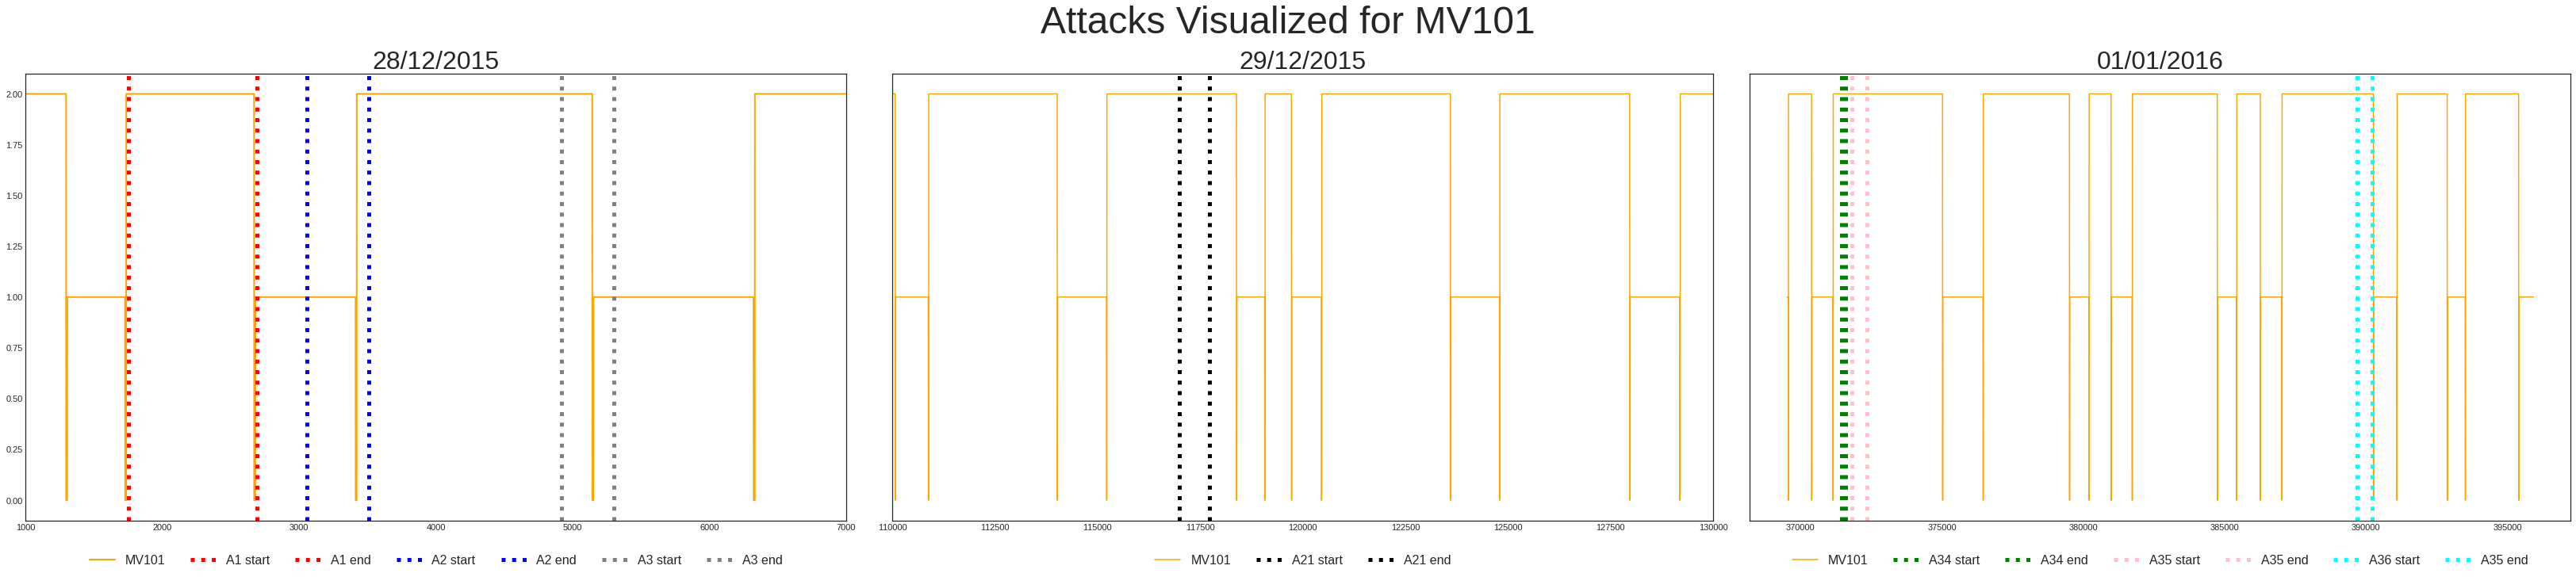

In [ ]:
fig, ax2 = plt.subplots(1,3, figsize = (45,10), sharey = True, constrained_layout=True)
feature = 'MV101'

ax2[0].plot(D1[feature][:8000], linewidth = 2, color = 'orange', label = feature)
ax2[0].axvline(x = A1_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 start')
ax2[0].axvline(x = A1_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 end')
ax2[0].axvline(x = A2_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 start')
ax2[0].axvline(x = A2_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 end')
ax2[0].axvline(x = A3_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 start')
ax2[0].axvline(x = A3_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 end')
ax2[0].set_xlim([1000, 7000])
ax2[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

ax2[1].plot(D2[feature][50000:], markersize = 1, color = 'orange', label = feature)
ax2[1].axvline(x = A21_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 start')
ax2[1].axvline(x = A21_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 end')
ax2[1].set_xlim([110000, 130000])
ax2[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, prop={'size': 16})

ax2[2].plot(D3[feature][60000:], markersize = 1, color = 'orange', label = feature)
ax2[2].axvline(x = A34_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 start')
ax2[2].axvline(x = A34_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 end')
ax2[2].axvline(x = A35_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 start')
ax2[2].axvline(x = A35_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 end')
ax2[2].axvline(x = A36_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A36 start')
ax2[2].axvline(x = A36_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A35 end')
ax2[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

fig.suptitle('Attacks Visualized for ' + feature, fontsize = 48)
ax2[0].set_title('28/12/2015', fontsize = 32)
ax2[1].set_title('29/12/2015', fontsize = 32)
ax2[2].set_title('01/01/2016', fontsize = 32)

Text(0.5, 1.0, '01/01/2016')

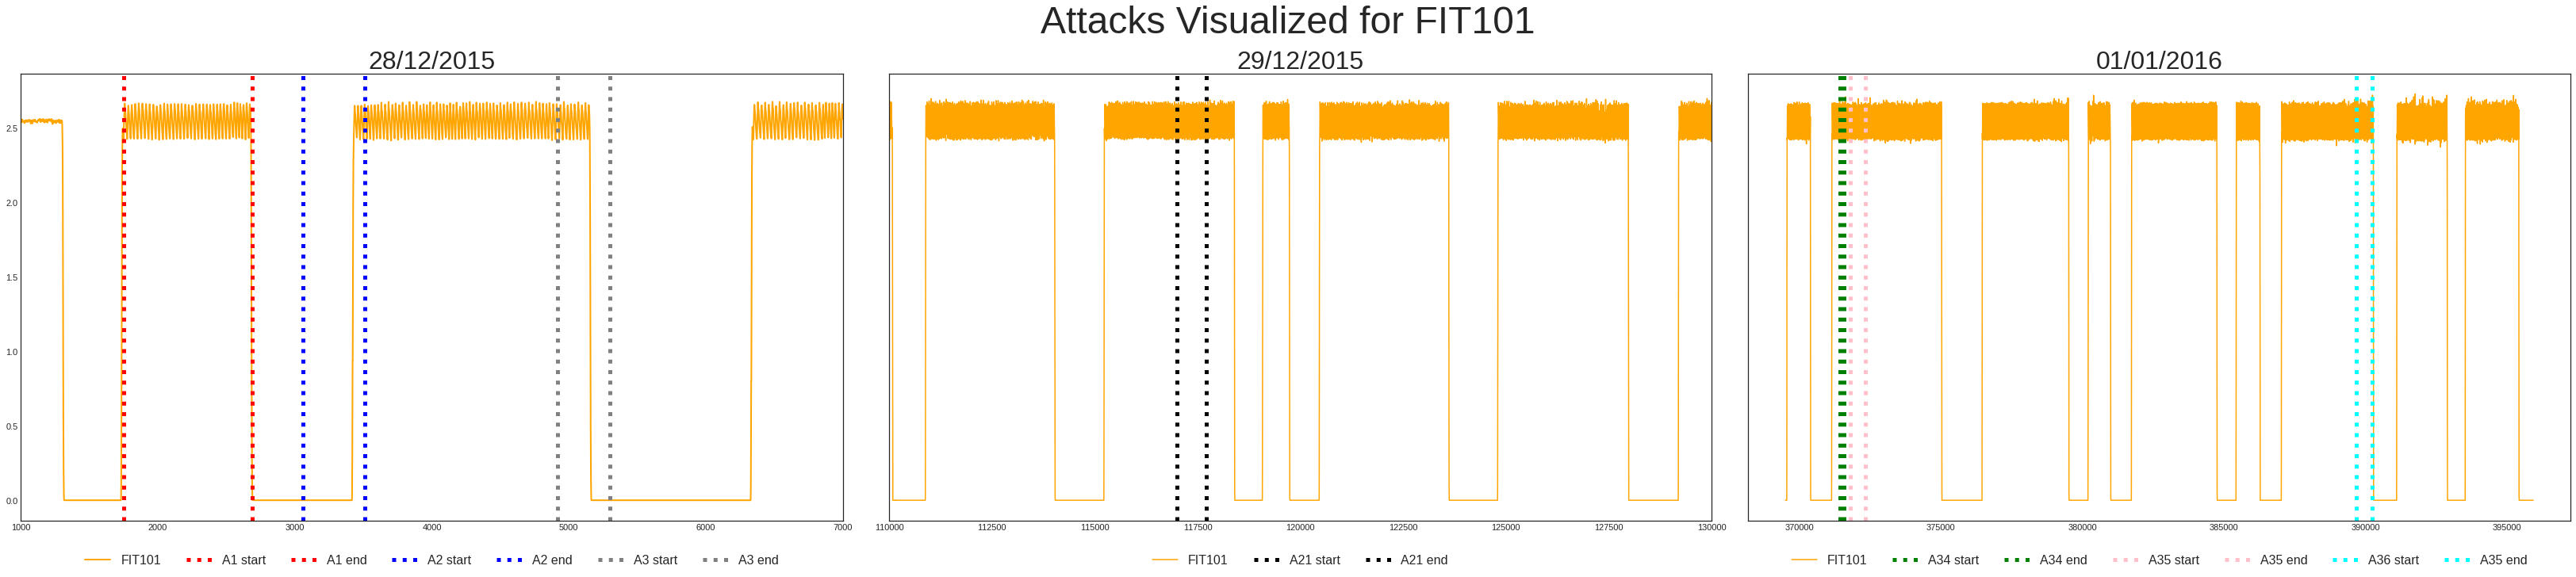

In [ ]:
fig, ax2 = plt.subplots(1,3, figsize = (45,10), sharey = True, constrained_layout=True)
feature = 'FIT101'

ax2[0].plot(D1[feature][:8000], linewidth = 2, color = 'orange', label = feature)
ax2[0].axvline(x = A1_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 start')
ax2[0].axvline(x = A1_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 end')
ax2[0].axvline(x = A2_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 start')
ax2[0].axvline(x = A2_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 end')
ax2[0].axvline(x = A3_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 start')
ax2[0].axvline(x = A3_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 end')
ax2[0].set_xlim([1000, 7000])
ax2[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

ax2[1].plot(D2[feature][50000:], markersize = 1, color = 'orange', label = feature)
ax2[1].axvline(x = A21_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 start')
ax2[1].axvline(x = A21_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 end')
ax2[1].set_xlim([110000, 130000])
ax2[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, prop={'size': 16})

ax2[2].plot(D3[feature][60000:], markersize = 1, color = 'orange', label = feature)
ax2[2].axvline(x = A34_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 start')
ax2[2].axvline(x = A34_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 end')
ax2[2].axvline(x = A35_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 start')
ax2[2].axvline(x = A35_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 end')
ax2[2].axvline(x = A36_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A36 start')
ax2[2].axvline(x = A36_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A35 end')
ax2[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

fig.suptitle('Attacks Visualized for ' + feature, fontsize = 48)
ax2[0].set_title('28/12/2015', fontsize = 32)
ax2[1].set_title('29/12/2015', fontsize = 32)
ax2[2].set_title('01/01/2016', fontsize = 32)

Text(0.5, 1.0, '01/01/2016')

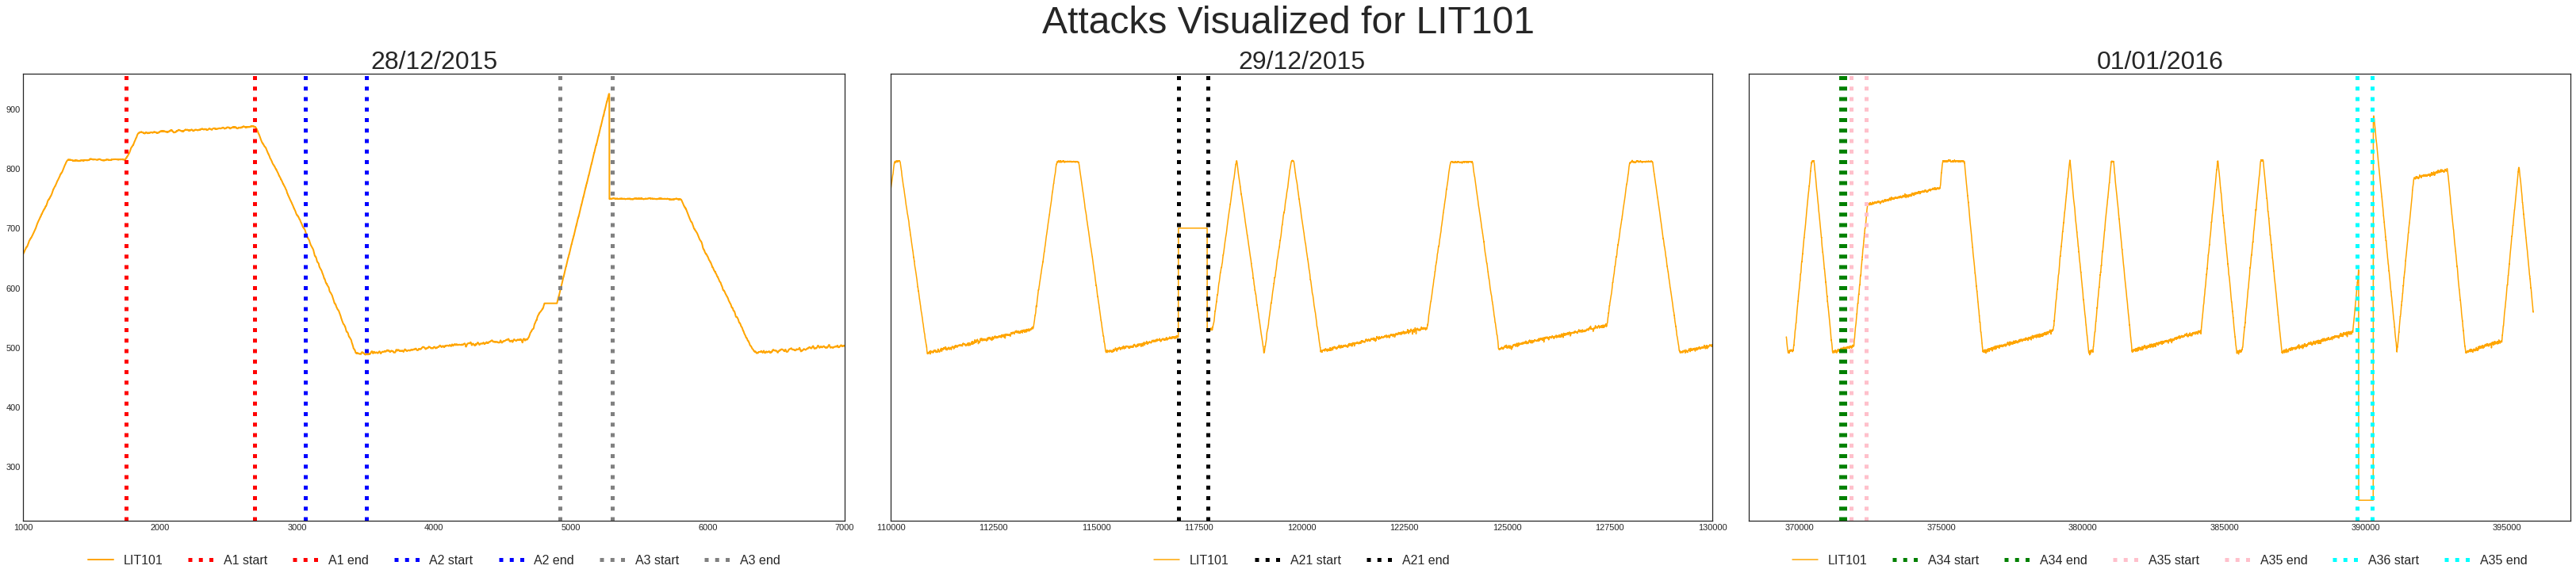

In [ ]:
fig, ax2 = plt.subplots(1,3, figsize = (45,10), sharey = True, constrained_layout=True)
feature = 'LIT101'

ax2[0].plot(D1[feature][:8000], linewidth = 2, color = 'orange', label = feature)
ax2[0].axvline(x = A1_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 start')
ax2[0].axvline(x = A1_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'red', label = 'A1 end')
ax2[0].axvline(x = A2_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 start')
ax2[0].axvline(x = A2_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'blue', label = 'A2 end')
ax2[0].axvline(x = A3_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 start')
ax2[0].axvline(x = A3_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 end')
ax2[0].set_xlim([1000, 7000])
ax2[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

ax2[1].plot(D2[feature][50000:], markersize = 1, color = 'orange', label = feature)
ax2[1].axvline(x = A21_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 start')
ax2[1].axvline(x = A21_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'black', label = 'A21 end')
ax2[1].set_xlim([110000, 130000])
ax2[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, prop={'size': 16})

ax2[2].plot(D3[feature][60000:], markersize = 1, color = 'orange', label = feature)
ax2[2].axvline(x = A34_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 start')
ax2[2].axvline(x = A34_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'green', label = 'A34 end')
ax2[2].axvline(x = A35_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 start')
ax2[2].axvline(x = A35_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'pink', label = 'A35 end')
ax2[2].axvline(x = A36_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A36 start')
ax2[2].axvline(x = A36_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'cyan', label = 'A35 end')
ax2[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})

fig.suptitle('Attacks Visualized for ' + feature, fontsize = 48)
ax2[0].set_title('28/12/2015', fontsize = 32)
ax2[1].set_title('29/12/2015', fontsize = 32)
ax2[2].set_title('01/01/2016', fontsize = 32)

## Initial Feature Analaysis ( This section is currently not used with autoencoder)


> In this section we will check for possibility to reduce redundant features or generate new based on available data. 



### Correlation Values for features in this phase

In [ ]:
correlation_matrix = P1_Normal.iloc[:,3:-1].astype(float)

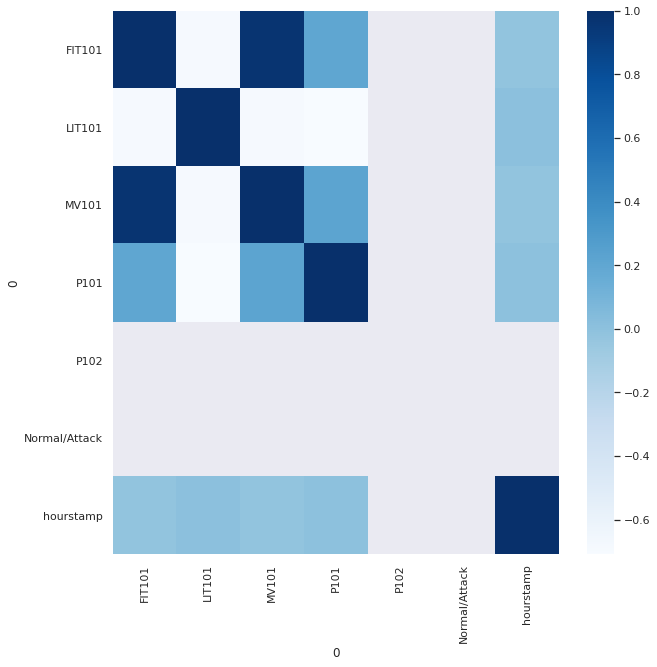

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation_matrix.corr(), annot = False, cmap = 'Blues', ax=ax)

In [ ]:
correlation_matrix.corr().abs().unstack().sort_values(ascending = False).transpose().sort_values(ascending = False).drop_duplicates().dropna()

hourstamp  hourstamp    1.000000
FIT101     MV101        0.970729
LIT101     P101         0.709089
FIT101     LIT101       0.687210
MV101      LIT101       0.686889
P101       MV101        0.219080
FIT101     P101         0.207256
           hourstamp    0.016164
hourstamp  MV101        0.015435
LIT101     hourstamp    0.006768
P101       hourstamp    0.004005
dtype: float64

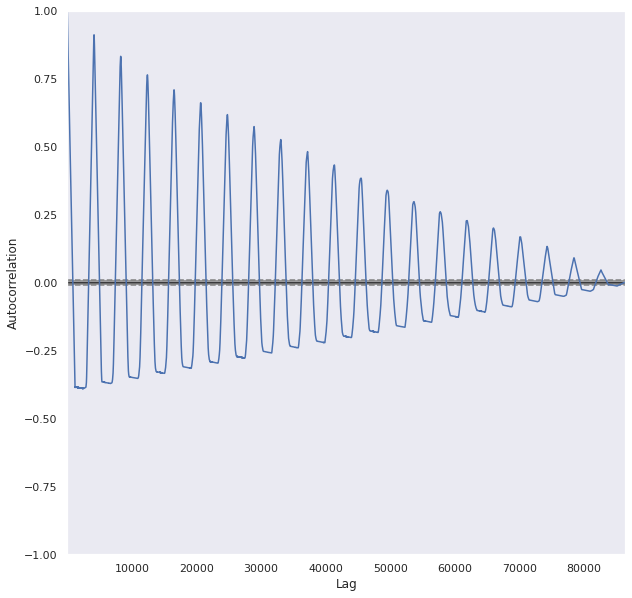

In [ ]:
pd.plotting.autocorrelation_plot(P1_Normal['FIT101'][:86400])

### Analysis of Data distribution in the two sets

In this section, we will try to find the following details.
1. What are the minimum and maximum bounds of operating signals during each hour of operations. Secondly, how these bands vary in the attack dataset.
2. What are the deviation trends.
3. How is the signal behaving in the +- 3mins mark during an attack. (3 mins is the minimum duration between attacks for this phase).

In [ ]:
P1_Normal_description = P1_Normal.groupby(['Date', 'hourstamp', 'Period']).describe(percentiles=[])
P1_Normal_description

0                            FIT101                      ... minutes            
                              count      mean       std  ...     min   50%   max
Date       hourstamp Period                              ...                    
23/12/2015 7         PM       799.0  2.546262  0.077877  ...    46.0  53.0  59.0
           8         PM      3600.0  1.712968  1.193822  ...     0.0  29.5  59.0
           9         PM      3600.0  1.715224  1.190683  ...     0.0  29.5  59.0
           10        PM      3600.0  2.038264  1.016837  ...     0.0  29.5  59.0
           11        PM      3600.0  2.126346  0.940301  ...     0.0  29.5  59.0
...                             ...       ...       ...  ...     ...   ...   ...
28/12/2015 6         AM      3600.0  2.017062  1.031986  ...     0.0  29.5  59.0
           7         AM      3600.0  2.184432  0.886752  ...     0.0  29.5  59.0
           8         AM      3600.0  1.753004  1.180107  ...     0.0  29.5  59.0
           9         AM      3600.0  1.705609  1.196939  ...     0.0  29.5  59.0
           12        AM      3600.0  1.991727  1.045860  ...     0.0  29.5  59.0

[111 rows x 42 columns]

In [ ]:
P1_Attack_description = P1_Attack.groupby(['Date', 'hourstamp', 'Period']).describe(percentiles=[])
P1_Attack_description

0                            FIT101                      ... minutes            
                              count      mean       std  ...     min   50%   max
Date       hourstamp Period                              ...                    
1/1/2016   1         AM      3600.0  1.687440  1.200068  ...     0.0  29.5  59.0
                     PM      3600.0  2.019459  1.028424  ...     0.0  29.5  59.0
           2         AM      3600.0  1.696527  1.196941  ...     0.0  29.5  59.0
                     PM      3600.0  1.758511  1.171388  ...     0.0  29.5  59.0
           3         AM      3600.0  1.681789  1.202761  ...     0.0  29.5  59.0
...                             ...       ...       ...  ...     ...   ...   ...
31/12/2015 10        PM      3600.0  1.352134  1.266860  ...     0.0  29.5  59.0
           11        AM      3600.0  1.055734  1.252921  ...     0.0  29.5  59.0
                     PM      3600.0  2.186740  0.881541  ...     0.0  29.5  59.0
           12        AM      3600.0  2.230619  0.833836  ...     0.0  29.5  59.0
                     PM      3600.0  2.063451  0.995059  ...     0.0  29.5  59.0

[125 rows x 42 columns]

# Functions


> Define functions to be used in this repo here.



In [ ]:
def create_traget_from_sequence(Series, lookback):
  '''
  This function generates target values on the basis of 
  a. lookback defined by the user. (History)
  b. Future term to be predicted

  For example: Using 50 historic values to predict the next value in a series.
  (Sequence to next value prediction)
  '''
	
  X = list() # The shape of this array will be (rows, window)
  Y = list() # The shape of this array will be (rows, 1)
  
  for start in range(len(Series)):
    end = start + lookback
    if end > len(Series)-1:
      break
    X_sequence, Y_term = Series[start:end, :-1], Series[end, -1]
    X.append(X_sequence)
    Y.append(Y_term)
      
  return np.array(X), np.array(Y)

In [ ]:
def gen_time_data_series(Series, lookback_window, future_window):
  '''
  This function generates target values on the basis of 
  a. lookback defined by the user. (History)
  b. Future window to be predicted. (Predicted)

  For example: Using 50 historic values to predict the next 10 values.
  (Sequence to sequence prediction)
  '''
  X_hist  = list() # The shape of this array will be (rows, lookback_window, features)
  Y_future = list() # The shape of this array will be (rows, future_window, features)
  Labels_hist = list()
  Labels_future = list()

  for initial_window in range(0,len(Series)):
    history = initial_window + lookback_window
    future = history + future_window
    if future > len(Series):
      break
    Past, Future = Series[initial_window:history, :-1], Series[history:future, :-1]
    X_hist.append(Past)
    Y_future.append(Future)
    labels_h, labels_f = Series[initial_window:history, -1], Series[history:future, -1]
    Labels_hist.append(labels_h)
    Labels_future.append(labels_f)

  return np.array(X_hist), np.array(Y_future), np.array(Labels_hist), np.array(Labels_future)

In [ ]:
# Function to transform Data into a Many to One supervised form
def transform_Data(Dataset, lag, label):
 
  X_dataset = Dataset.values
  Y_dataset = Dataset[label]

  X = list()
  Y = list()
  for i in range(len(X_dataset)-lag-1):
    temp = []
    for k in range(1, lag+1):
      temp.append(X_dataset[[(i+k+1)], :])
      X.append(temp)
      Y.append(Y_dataset[i+lag+1])
  
  # Reshape Data (From 4D tensor to 3D tensor)
  X = np.array(X)
  Y = np.array(Y)
  X = X.reshape(X.shape[0], lag, X.shape[3])

  return X, Y

In [ ]:
# This function flattens the tensor back to the 2d matrix (observations, features)
def convert_3d_to_2d(Tensor):
    temp_array = []  # sample x features array.
    for i in range(Tensor.shape[0]):
        temp_array.append(Tensor[i, (Tensor.shape[1]-1), :])
    
    return np.array(temp_array)

# Input Data and Feature Preparation

In [ ]:
scaler = MinMaxScaler()

In [ ]:
N = scaler.fit_transform(P1_Normal.iloc[:, 3:])
Dataset_N = pd.DataFrame(N, columns = P1_Normal.columns[3:])
Dataset_N = Dataset_N[['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'hourstamp', 'minutes', 'Normal/Attack']]
Dataset_N

0         FIT101    LIT101  MV101  ...  hourstamp   minutes  Normal/Attack
0       0.926730  0.045401    1.0  ...   0.545455  0.779661            0.0
1       0.920896  0.043860    1.0  ...   0.545455  0.779661            0.0
2       0.916696  0.044452    1.0  ...   0.545455  0.779661            0.0
3       0.911096  0.045756    1.0  ...   0.545455  0.779661            0.0
4       0.904679  0.045993    1.0  ...   0.545455  0.779661            0.0
...          ...       ...    ...  ...        ...       ...            ...
396794  0.896278  0.110597    1.0  ...   0.727273  1.000000            0.0
396795  0.892078  0.110360    1.0  ...   0.727273  1.000000            0.0
396796  0.886944  0.110123    1.0  ...   0.727273  1.000000            0.0
396797  0.884611  0.110242    1.0  ...   0.727273  1.000000            0.0
396798  0.884144  0.110005    1.0  ...   0.727273  1.000000            0.0

[396799 rows x 8 columns]

In [ ]:
A = scaler.fit_transform(P1_Attack.iloc[:, 3:])
Dataset_A = pd.DataFrame(A, columns = P1_Attack.columns[3:])
Dataset_A = Dataset_A[['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'hourstamp', 'minutes', 'Normal/Attack']]
Dataset_A

0         FIT101    LIT101  MV101  ...  hourstamp  minutes  Normal/Attack
0       0.886285  0.453015    1.0  ...   0.818182      0.0            0.0
1       0.901833  0.452962    1.0  ...   0.818182      0.0            0.0
2       0.918195  0.453122    1.0  ...   0.818182      0.0            0.0
3       0.930842  0.453816    1.0  ...   0.818182      0.0            0.0
4       0.945347  0.454350    1.0  ...   0.818182      0.0            0.0
...          ...       ...    ...  ...        ...      ...            ...
449913  0.927477  0.448477    1.0  ...   0.090909      1.0            0.0
449914  0.923532  0.449652    1.0  ...   0.090909      1.0            0.0
449915  0.917150  0.450026    1.0  ...   0.090909      1.0            0.0
449916  0.913437  0.450079    1.0  ...   0.090909      1.0            0.0
449917  0.906359  0.450613    1.0  ...   0.090909      1.0            0.0

[449918 rows x 8 columns]

In [ ]:
Dataset_A = Dataset_A.drop(['MV101', 'P101', 'P102','hourstamp', 'minutes'], axis = 1)
Dataset_N = Dataset_N.drop(['MV101', 'P101', 'P102','hourstamp', 'minutes'], axis = 1)

In [ ]:
lookback_window = 25
label = 'Normal/Attack'
future_window = 25
Samples = 300099
Train_Data = Dataset_N.iloc[:Samples,:].values
Test_Data = Dataset_A.iloc[:50049,:].values
Validation_Data = Dataset_N.iloc[Samples+701:Samples+50750, :].values

In [ ]:
X_Train, Y_Train, Train_Labels_hist, Train_Labels_future = gen_time_data_series(Train_Data, lookback_window, future_window)
print(X_Train.shape, Y_Train.shape, Train_Labels_hist.shape, Train_Labels_future.shape)

(300050, 25, 2) (300050, 25, 2) (300050, 25) (300050, 25)


In [ ]:
X_Test, Y_Test, Test_Labels_hist, Test_Labels_future = gen_time_data_series(Test_Data, lookback_window, future_window)
print(X_Test.shape, Y_Test.shape, Test_Labels_hist.shape, Test_Labels_future.shape)

(50000, 25, 2) (50000, 25, 2) (50000, 25) (50000, 25)


In [ ]:
X_Validation, Y_Validation, Validation_Labels_hist, Validation_Labels_future = gen_time_data_series(Validation_Data, lookback_window, future_window)
print(X_Validation.shape, Y_Validation.shape, Validation_Labels_hist.shape, Validation_Labels_future.shape)

(50000, 25, 2) (50000, 25, 2) (50000, 25) (50000, 25)


# Model Architectures

In [ ]:
pip install keras_flops

# Classification of Anomalies Stage

The problem is approached as a one-class classification problem since the training dataset contains no labels pertaining to attacks. The LSTM Autoencoder will learn to adopt to normal behaviour of the ICS and any signal outside this normal behaviour will be classified as an anomaly.

In [ ]:
pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Conv1D, Flatten, RepeatVector, TimeDistributed
from tensorflow.keras import Input, Model, regularizers
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization, LayerNormalization
from keras.callbacks import CSVLogger, History, ModelCheckpoint, EarlyStopping
from keras_flops import get_flops
history = History()

ModuleNotFoundError: ignored

### Autoencoder Architecture

In [ ]:
del AE_model, autoencoder

In [ ]:
# data dimensions // hyperparameters 
timesteps, n_features = X_Train.shape[1], X_Train.shape[2]
input_dim = (timesteps, n_features)
activation_func = 'tanh'
BATCH_SIZE = 300
EPOCHS = 100

autoencoder = Sequential()
# encoder
autoencoder.add(Conv1D(16, 3, activation = 'tanh', input_shape = (timesteps, n_features), padding = 'causal'))
autoencoder.add(LSTM(84, activation = activation_func, input_shape = (timesteps, n_features), return_sequences = True, stateful = False)) 
autoencoder.add(LSTM(32, activation = activation_func, return_sequences = False, stateful = False))
#autoencoder.add(LayerNormalization(scale=False, center=False))
#autoencoder.add(Dropout(0.2))

autoencoder.add(RepeatVector(timesteps))
    
# decoder
autoencoder.add(LSTM(32, activation = activation_func, return_sequences = True, stateful = False))
autoencoder.add(LSTM(84, activation = 'sigmoid', return_sequences = True, stateful = False))
autoencoder.add(TimeDistributed(Dense(n_features)))   

# Checkpoints
filepath = "AE_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
callbacks_list = [checkpoint]

# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 50)

# Model Training
autoencoder.compile(optimizer = "adam", loss = "mae", metrics = ["mse"])

# print an overview of our model
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 16)            112       
_________________________________________________________________
lstm (LSTM)                  (None, 25, 84)            33936     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                14976     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 25, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 84)            39312     
_________________________________________________________________
time_distributed (TimeDistri (None, 25, 2)             1

In [ ]:
# Train the Model
start_time = time.time()
AE_model = autoencoder.fit(X_Train, Y_Train, 
                           batch_size = BATCH_SIZE, epochs = EPOCHS, 
                           callbacks = [callbacks_list, es], 
                           validation_split = 0.2, shuffle = False,
                           verbose = 1)

Epoch 1/100
801/801 [==============================] - 94s 60ms/step - loss: 0.1781 - mse: 0.0769 - val_loss: 0.1045 - val_mse: 0.0253

Epoch 00001: val_loss improved from inf to 0.10446, saving model to AE_best.hdf5
Epoch 2/100
801/801 [==============================] - 46s 57ms/step - loss: 0.0879 - mse: 0.0198 - val_loss: 0.0636 - val_mse: 0.0089

Epoch 00002: val_loss improved from 0.10446 to 0.06359, saving model to AE_best.hdf5
Epoch 3/100
801/801 [==============================] - 46s 57ms/step - loss: 0.0560 - mse: 0.0075 - val_loss: 0.0363 - val_mse: 0.0046

Epoch 00003: val_loss improved from 0.06359 to 0.03632, saving model to AE_best.hdf5
Epoch 4/100
801/801 [==============================] - 46s 57ms/step - loss: 0.0519 - mse: 0.0064 - val_loss: 0.0390 - val_mse: 0.0047

Epoch 00004: val_loss did not improve from 0.03632
Epoch 5/100
801/801 [==============================] - 46s 57ms/step - loss: 0.0460 - mse: 0.0052 - val_loss: 0.0491 - val_mse: 0.0061

Epoch 00005: val_l

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 4672.4903156757355 seconds ---


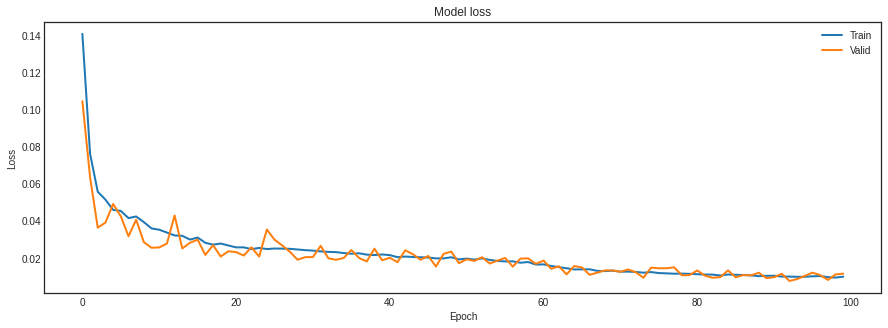

In [ ]:
plt.plot(AE_model.history['loss'], linewidth=2, label='Train')
plt.plot(AE_model.history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

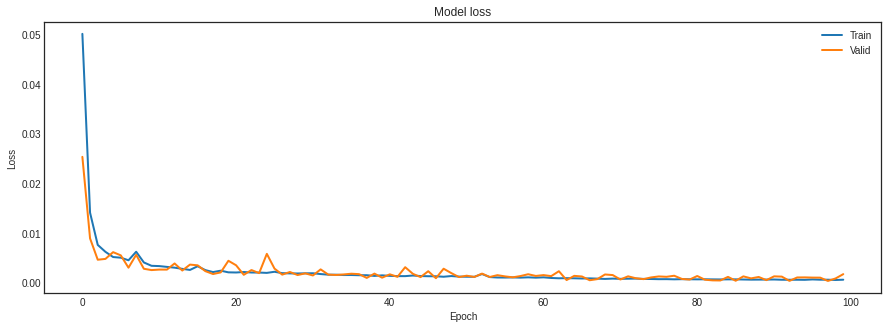

In [ ]:
plt.plot(AE_model.history['mse'], linewidth=2, label='Train')
plt.plot(AE_model.history['val_mse'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from google.colab import files
files.download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Reconstruction

For Predictions using Autoencoders we will first find the loss distribution on the training set. Based on this information a threshold will be calculated and any outliers will be classified as anomaly

> First, predictions are made based on the tensor input. then these values are flattened back to the 2d format (observation, feature). A loss function is computed to get reconstruction costs.

In [ ]:
autoencoder = load_model('/content/AE_best (18).hdf5')

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 16)            112       
_________________________________________________________________
lstm (LSTM)                  (None, 25, 84)            33936     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                14976     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 25, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 84)            39312     
_________________________________________________________________
time_distributed (TimeDistri (None, 25, 2)             1

In [ ]:
# Make Predictions
#train_x_predictions = autoencoder.predict(X_Train)
validation_x_predictions = autoencoder.predict(X_Validation)
test_x_predictions = autoencoder.predict(X_Test)

In [ ]:
import math as m

In [ ]:
def calc_reconstruction_loss(y_pred, y_true, loss, type_of_data):
  '''
  1. loss is the str type 'mae' or 'mse'.
  2. Z-score gives the information on how far is a data point from the mean of whole dataset in terms of its standard deviation
  3. Type of data is str object: Train, Test or Validation
  '''

  # Calculate mae/mse loss
  if loss == 'mae':
    error_calc = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.SUM)
  elif loss == 'mse':
    error_calc = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
  elif loss == 'msle':
    error_calc = tf.keras.losses.msle
  
  loss = []
  for window in range(0, len(y_pred)):
    e_y = error_calc(y_true[window], y_pred[window]).numpy()
    loss.append(e_y)

  # Calculate  modified Z-Score  
  Z_Score = []
  for window in range(0, len(y_pred)):
    median = np.median(y_true[window])
    abs = np.abs(y_pred[window] - median)
    k = np.percentile(y_true[window], 75) #constant
    z_score = k*abs/np.median(abs) # Calculates z score for each unit of sequence
    Z_Score.append(np.mean(z_score)) # gives avg deviation for the entire sequence
  
  # Construct a Dataframe
  
  Loss_Information_database = pd.DataFrame({str(type_of_data) + ' Loss': loss,
                                            str(type_of_data) + ' Z-score': Z_Score})
  return Loss_Information_database

In [ ]:
loss = 'mse'

In [ ]:
Test_Loss = calc_reconstruction_loss(Y_Test[:,:,0], test_x_predictions[:,:,0], loss, 'Test')
Test_Loss

Test Loss  Test Z-score
0       0.000087      0.904498
1       0.000075      0.900214
2       0.000049      0.931805
3       0.000040      0.839864
4       0.000043      0.877961
...          ...           ...
49995   0.000020     -0.004233
49996   0.000020     -0.004235
49997   0.000020     -0.004237
49998   0.000020     -0.004237
49999   0.000020     -0.004236

[50000 rows x 2 columns]

In [ ]:
Test_Loss.describe()

Test Loss  Test Z-score
count  50000.000000  50000.000000
mean       0.011681      0.682457
std        0.087715      1.504729
min        0.000003     -0.241714
25%        0.000020     -0.001772
50%        0.000053      0.868746
75%        0.000113      0.917582
max        0.867760    314.818158

In [ ]:
Validation_Loss = calc_reconstruction_loss(Y_Validation[:,:,0], validation_x_predictions[:,:,0], loss, 'Validation')

In [ ]:
Validation_Loss.describe()

Validation Loss  Validation Z-score
count     5.000000e+04        50000.000000
mean      5.147337e-04            0.760070
std       5.778779e-03            2.864837
min       1.887771e-07           -0.028931
25%       1.695305e-05            0.000771
50%       3.803299e-05            0.889549
75%       8.658420e-05            0.957208
max       1.974509e-01          400.003623

In [ ]:
Train_Loss = calc_reconstruction_loss(Y_Train[:,:,0], train_x_predictions[:,:,0], loss, 'Train')

In [ ]:
Train_Loss.describe()

### Plot Reconstructed Signals

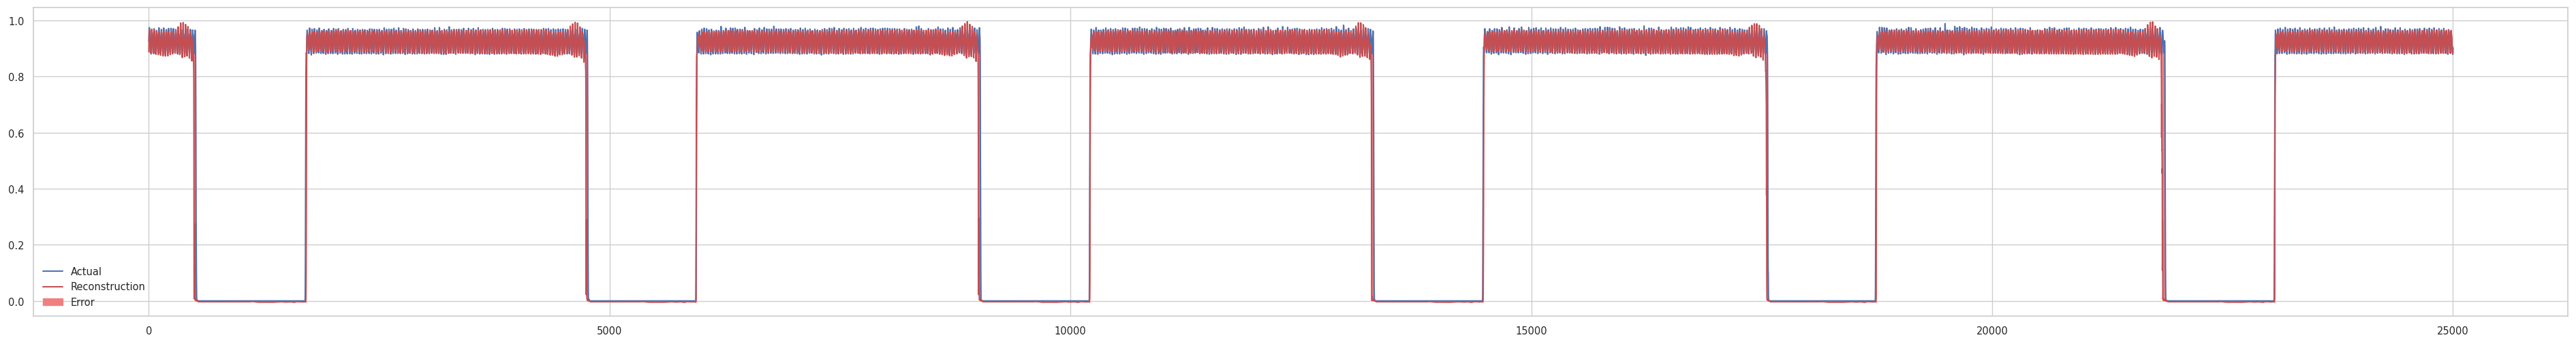

In [ ]:
lengths = 25000
plt.figure(figsize=(40,5), dpi = 120)
plt.plot(convert_3d_to_2d(Y_Validation)[:lengths,0], 'b')
plt.plot(convert_3d_to_2d(validation_x_predictions)[:lengths,0], 'r')
plt.fill_between(np.arange(lengths), convert_3d_to_2d(validation_x_predictions)[:lengths,0], convert_3d_to_2d(Y_Validation)[:lengths,0], color='lightcoral')
plt.legend(labels=["Actual", "Reconstruction", "Error"])
plt.show()

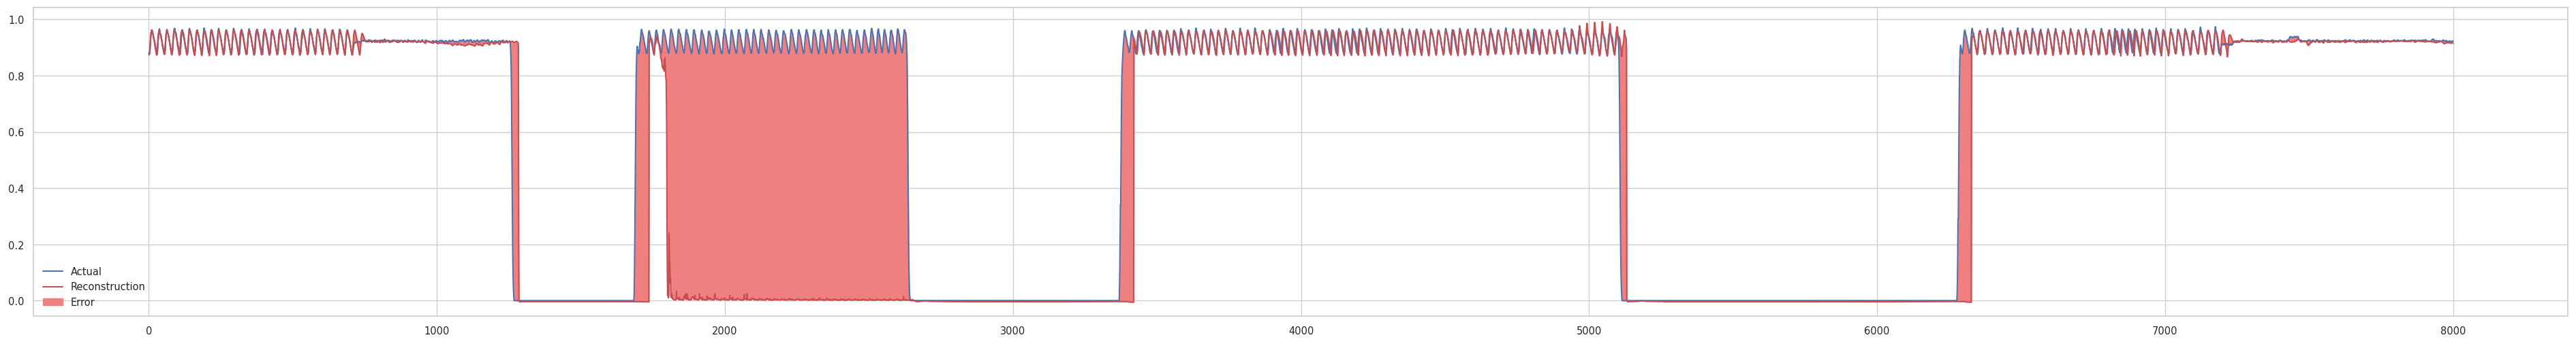

In [ ]:
lengths = 8000
plt.figure(figsize=(40,5), dpi = 120)
plt.plot(convert_3d_to_2d(Y_Test)[:lengths,0], 'b')
plt.plot(convert_3d_to_2d(test_x_predictions)[:lengths,0], 'r')
plt.fill_between(np.arange(lengths), convert_3d_to_2d(test_x_predictions)[:lengths,0], convert_3d_to_2d(Y_Test)[:lengths,0], color='lightcoral')
plt.legend(labels=["Actual", "Reconstruction", "Error"])
plt.show()

### Checking Test Data with known attack timestamps

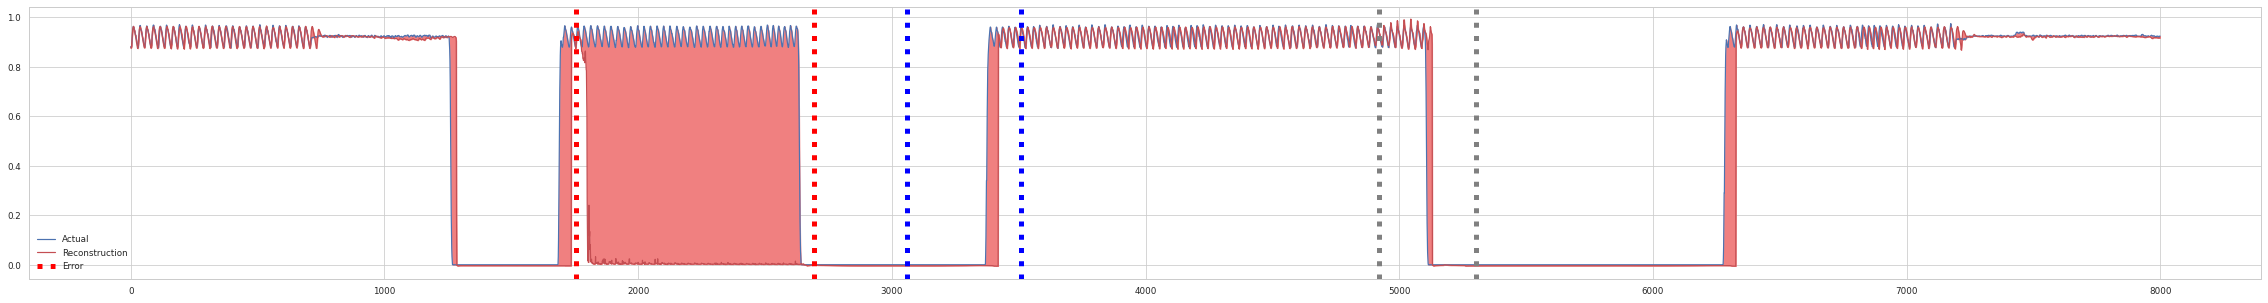

In [ ]:
fig, ax5 = plt.subplots(figsize = (40,5))

ax5.plot(convert_3d_to_2d(Y_Test)[:8000,0], 'b')
ax5.plot(convert_3d_to_2d(test_x_predictions)[:8000,0], 'r')
ax5.fill_between(np.arange(8000), convert_3d_to_2d(test_x_predictions)[:8000,0], convert_3d_to_2d(Y_Test)[:8000,0], color='lightcoral')
ax5.axvline(x = A1_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A1 start')
ax5.axvline(x = A1_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A1 end')
ax5.axvline(x = A2_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A2 start')
ax5.axvline(x = A2_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A2 end')
ax5.axvline(x = A3_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 start')
ax5.axvline(x = A3_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 end')
ax5.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})
plt.legend(labels=["Actual", "Reconstruction", "Error"])
plt.show()

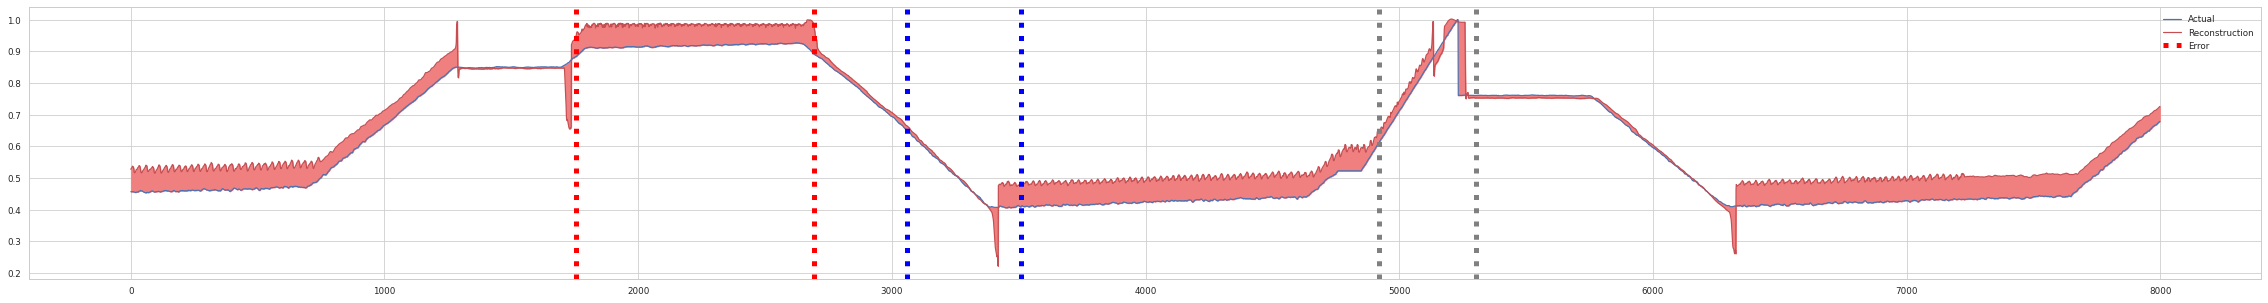

In [ ]:
fig, ax5 = plt.subplots(figsize = (40,5))

ax5.plot(convert_3d_to_2d(Y_Test)[:8000,1], 'b')
ax5.plot(convert_3d_to_2d(test_x_predictions)[:8000,1], 'r')
ax5.fill_between(np.arange(8000), convert_3d_to_2d(test_x_predictions)[:8000,1], convert_3d_to_2d(Y_Test)[:8000,1], color='lightcoral')
ax5.axvline(x = A1_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A1 start')
ax5.axvline(x = A1_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A1 end')
ax5.axvline(x = A2_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A2 start')
ax5.axvline(x = A2_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A2 end')
ax5.axvline(x = A3_start, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 start')
ax5.axvline(x = A3_end, ymin = 0, ymax = 1, linewidth = 5, linestyle = ':', color = 'grey', label = 'A3 end')
ax5.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7, prop={'size': 16})
plt.legend(labels=["Actual", "Reconstruction", "Error"])
plt.show()

## Check for Error Distribution

In [ ]:
Loss = pd.concat([Validation_Loss.iloc[:,0], Test_Loss.iloc[:,0]], axis = 1)
ZScore = pd.concat([Validation_Loss.iloc[:,1], Test_Loss.iloc[:,1]], axis = 1)
Loss

Validation Loss  Test Loss
0             0.000104   0.000087
1             0.000074   0.000075
2             0.000061   0.000049
3             0.000074   0.000040
4             0.000097   0.000043
...                ...        ...
49995         0.000017   0.000020
49996         0.000017   0.000020
49997         0.000017   0.000020
49998         0.000017   0.000020
49999         0.000017   0.000020

[50000 rows x 2 columns]

In [ ]:
% ZScore

Validation Z-score  Test Z-score
0                0.894034      0.996957
1                0.929094      0.972819
2                0.935671      0.949449
3                0.930199      0.917739
4                0.922349      0.915523
...                   ...           ...
49995            5.369867      9.580094
49996            5.377972      9.587549
49997            5.415486      9.594152
49998            5.466330      9.594784
49999            5.512518      9.593081

[50000 rows x 2 columns]

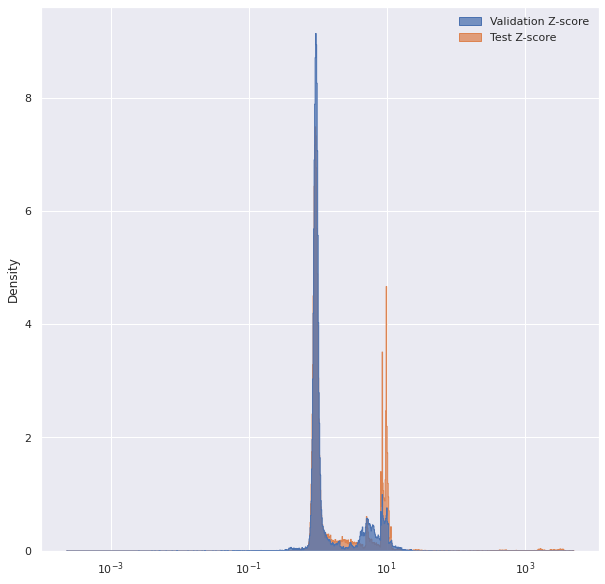

In [ ]:
% sns.histplot(data=ZScore, bins = 1000, kde = False, stat = 'density', common_norm = False, element = 'step', log_scale=True)

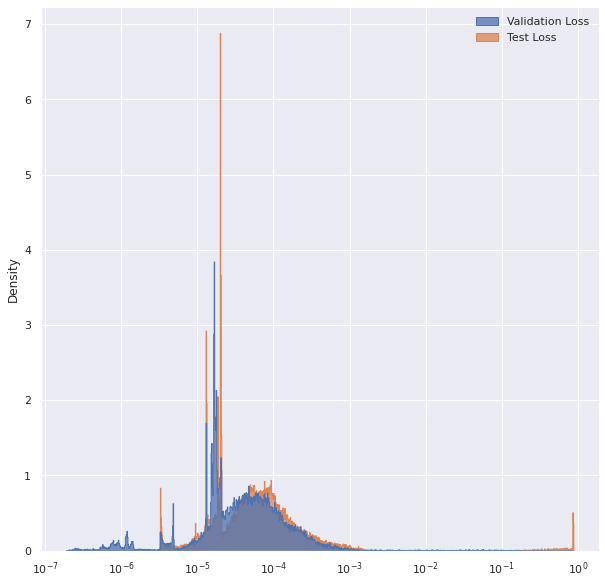

In [ ]:
sns.histplot(data=Loss, bins = 1000, kde = False, stat = 'density', common_norm = False, element = 'step', log_scale=True)

In [ ]:
Test_error = list()
Test_Labels = list()
for i in range(0, len(Test_Labels_future)):
  error_perce = np.sum(Test_Labels_future[i])/lookback_window
  Test_error.append(error_perce)
  if error_perce != 0:
    Test_Labels.append(1)
  else:
    Test_Labels.append(0)
Labels_list = pd.DataFrame({'Test Error Distribution': Test_error, 'True Labels': Test_Labels})

In [ ]:
Labels_list

Test Error Distribution  True Labels
0                          0.0            0
1                          0.0            0
2                          0.0            0
3                          0.0            0
4                          0.0            0
...                        ...          ...
49995                      0.0            0
49996                      0.0            0
49997                      0.0            0
49998                      0.0            0
49999                      0.0            0

[50000 rows x 2 columns]

In [ ]:
Labels_list.value_counts()

Test Error Distribution  True Labels
0.00                     0              45342
1.00                     1               4274
0.92                     1                 16
0.88                     1                 16
0.04                     1                 16
0.08                     1                 16
0.12                     1                 16
0.16                     1                 16
0.20                     1                 16
0.24                     1                 16
0.28                     1                 16
0.32                     1                 16
0.36                     1                 16
0.40                     1                 16
0.44                     1                 16
0.96                     1                 16
0.52                     1                 16
0.56                     1                 16
0.60                     1                 16
0.64                     1                 16
0.68                     1                 

### Analysing Reconstruction values to determine optimum threshold value.

* It can be observed that the avg reconstruction loss and std for the test set is significantly higher (10x) than for the training set. 
* ANother metric to check for anomaly is the zscore. we check how far is the sequence from the normal data distribution

In [ ]:
Anomaly = pd.concat([Test_Loss, Labels_list], axis = 1)
Anomaly

Test Loss  Test Z-score  Test Error Distribution  True Labels
0       0.000087      0.904498                      0.0            0
1       0.000075      0.900214                      0.0            0
2       0.000049      0.931805                      0.0            0
3       0.000040      0.839864                      0.0            0
4       0.000043      0.877961                      0.0            0
...          ...           ...                      ...          ...
49995   0.000020     -0.004233                      0.0            0
49996   0.000020     -0.004235                      0.0            0
49997   0.000020     -0.004237                      0.0            0
49998   0.000020     -0.004237                      0.0            0
49999   0.000020     -0.004236                      0.0            0

[50000 rows x 4 columns]

In [ ]:
def sequence_threshold(Anomaly_Dataframe, threshold, metric, window):

  # Check if the metric is beyond the threshold for given sequence and log related data points' index of the sequence. 
  Anomaly_Data_Index = []
  Predicted_Label = []
  series = Anomaly_Dataframe[metric]
  for i in range(len(Anomaly_Dataframe)):
    if series[i] >= threshold:
      Predicted_Label.append(1)

      # Update Index Array
      data_points = list(range(i,i+window))
      Anomaly_Data_Index.append(data_points)
    else:
      Predicted_Label.append(0)  
      
  # Filter Anomaly Index
  Anomaly_Data_Index = np.unique(Anomaly_Data_Index)
  # Update Dataframe
  Anomaly['Predicted Label'] = Predicted_Label

  return Anomaly

In [ ]:
def show_metrics_report(y_true, y_pred):

  # Precision
  p_s = precision_score(y_true, y_pred)
  # Recall
  r_s = recall_score(y_true, y_pred)
  # F1_score
  f1 = f1_score(y_true, y_pred)
  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
  # AUC Score
  auc_score = roc_auc_score(y_true, y_pred)
  # ROC Characteristics
  fpr, tpr, threshold = roc_curve(y_true, y_pred)
  roc = [fpr, tpr, threshold]

  # Specificity and Senstivity
  Se = tp/(tp + fn) 
  Sp = tn/(fn+tn)
  Gmean = m.sqrt(Se*Sp)

  '''
  print(f"Precision Score: {p_s}",
        f"Recall Score: {r_s}",
        f"f1 Score: {f1}")
  '''
  metric_table = {'Senstivity': r_s, 'Specificity': Sp, 'G Mean':Gmean, 'Precision': p_s, 'F1 Score': f1, 'AUC_score': auc_score}
  return metric_table, cm, roc

## Threshold decided on the basis of Loss

In [ ]:
Thresholds = np.percentile(Loss['Validation Loss'], [75, 80, 85, 90, 95, 96, 97, 98, 99])

In [ ]:
Anomaly = sequence_threshold(Anomaly, Thresholds[0], 'Test Loss', future_window)
Anomaly

Test Loss  Test Z-score  ...  True Labels  Predicted Label
0       0.000087      0.904498  ...            0                0
1       0.000075      0.900214  ...            0                0
2       0.000049      0.931805  ...            0                0
3       0.000040      0.839864  ...            0                0
4       0.000043      0.877961  ...            0                0
...          ...           ...  ...          ...              ...
49995   0.000020     -0.004233  ...            0                0
49996   0.000020     -0.004235  ...            0                0
49997   0.000020     -0.004237  ...            0                0
49998   0.000020     -0.004237  ...            0                0
49999   0.000020     -0.004236  ...            0                0

[50000 rows x 5 columns]

In [ ]:
A1_start

array([1753])

In [ ]:
A2_start

array([3059])

In [ ]:
Anomaly.iloc[3050:3080, :]

Test Loss  Test Z-score  ...  True Labels  Predicted Label
3050   0.000013     -0.003348  ...            1                0
3051   0.000013     -0.003339  ...            1                0
3052   0.000013     -0.003332  ...            1                0
3053   0.000013     -0.003323  ...            1                0
3054   0.000013     -0.003314  ...            1                0
3055   0.000013     -0.003330  ...            1                0
3056   0.000013     -0.003344  ...            1                0
3057   0.000013     -0.003355  ...            1                0
3058   0.000013     -0.003354  ...            1                0
3059   0.000013     -0.003352  ...            1                0
3060   0.000013     -0.003347  ...            1                0
3061   0.000013     -0.003341  ...            1                0
3062   0.000013     -0.003335  ...            1                0
3063   0.000013     -0.003331  ...            1                0
3064   0.000013     -0.003327  ...            1                0
3065   0.000013     -0.003324  ...            1                0
3066   0.000013     -0.003322  ...            1                0
3067   0.000013     -0.003319  ...            1                0
3068   0.000013     -0.003314  ...            1                0
3069   0.000013     -0.003308  ...            1                0
3070   0.000013     -0.003300  ...            1                0
3071   0.000013     -0.003292  ...            1                0
3072   0.000013     -0.003285  ...            1                0
3073   0.000013     -0.003280  ...            1                0
3074   0.000013     -0.003276  ...            1                0
3075   0.000013     -0.003271  ...            1                0
3076   0.000013     -0.003265  ...            1                0
3077   0.000013     -0.003259  ...            1                0
3078   0.000013     -0.003253  ...            1                0
3079   0.000013     -0.003249  ...            1                0

[30 rows x 5 columns]

In [ ]:
Anomaly.iloc[1750:1780, :]

Test Loss  Test Z-score  ...  True Labels  Predicted Label
1750   0.000059      0.886350  ...            1                0
1751   0.000061      0.881745  ...            1                0
1752   0.000079      0.880244  ...            1                0
1753   0.000122      0.876531  ...            1                1
1754   0.000162      0.908350  ...            1                1
1755   0.000150      0.943058  ...            1                1
1756   0.000159      0.951372  ...            1                1
1757   0.000183      0.859003  ...            1                1
1758   0.000233      0.939021  ...            1                1
1759   0.000288      1.142037  ...            1                1
1760   0.000359      1.109449  ...            1                1
1761   0.000422      1.009838  ...            1                1
1762   0.000448      1.050275  ...            1                1
1763   0.000457      1.102171  ...            1                1
1764   0.000492      1.109310  ...            1                1
1765   0.000582      1.226571  ...            1                1
1766   0.000649      1.234782  ...            1                1
1767   0.000674      1.152441  ...            1                1
1768   0.000672      1.125219  ...            1                1
1769   0.000712      1.112008  ...            1                1
1770   0.000671      1.368314  ...            1                1
1771   0.000576      0.972372  ...            1                1
1772   0.000485      0.873503  ...            1                1
1773   0.000413      0.929841  ...            1                1
1774   0.000350      0.877281  ...            1                1
1775   0.000316      0.861216  ...            1                1
1776   0.000317      0.844711  ...            1                1
1777   0.000324      0.898242  ...            1                1
1778   0.000357      0.899315  ...            1                1
1779   0.000353      0.891227  ...            1                1

[30 rows x 5 columns]

In [ ]:
np.where(Anomaly['Predicted Label']==1)

(array([    7,    31,    32, ..., 49904, 49905, 49906]),)

In [ ]:
CM = []
Metric_Table = []
ROC = []

for thresh in Thresholds:
  Anomaly = sequence_threshold(Anomaly, thresh, 'Test Loss', future_window)
  metric, cm, roc = show_metrics_report(Anomaly['True Labels'], Anomaly['Predicted Label'])
  metric['Threshold'] = thresh
  Metric_Table.append(metric)
  CM.append(cm)
  ROC.append(roc)

Metric_Table = pd.DataFrame(Metric_Table)

In [ ]:
Metric_Table

Senstivity  Specificity    G Mean  Precision  F1 Score  AUC_score  Threshold
0    0.499356     0.930014  0.681475   0.139457  0.218025   0.591403   0.000087
1    0.433663     0.928059  0.634401   0.151527  0.224582   0.592101   0.000106
2    0.366896     0.925592  0.582748   0.164850  0.227488   0.587973   0.000135
3    0.306569     0.924418  0.532352   0.196559  0.239537   0.588918   0.000192
4    0.244955     0.922610  0.475392   0.250494  0.247693   0.584830   0.000313
5    0.229283     0.922141  0.459817   0.274480  0.249854   0.583511   0.000370
6    0.206312     0.921084  0.435925   0.304789  0.246063   0.578984   0.000482
7    0.167454     0.918502  0.392182   0.322848  0.220526   0.565686   0.000687
8    0.052168     0.909321  0.217802   0.185213  0.081407   0.514296   0.004173

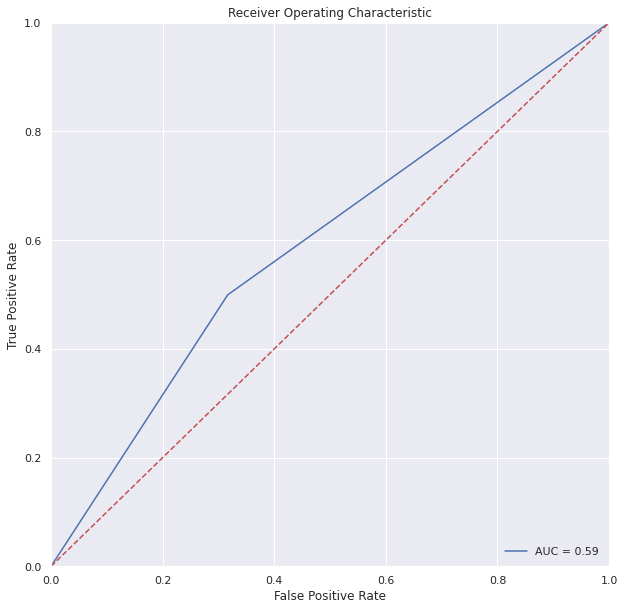

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(ROC[0][0], ROC[0][1], 'b', label = 'AUC = %0.2f' % Metric_Table['AUC_score'][0])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

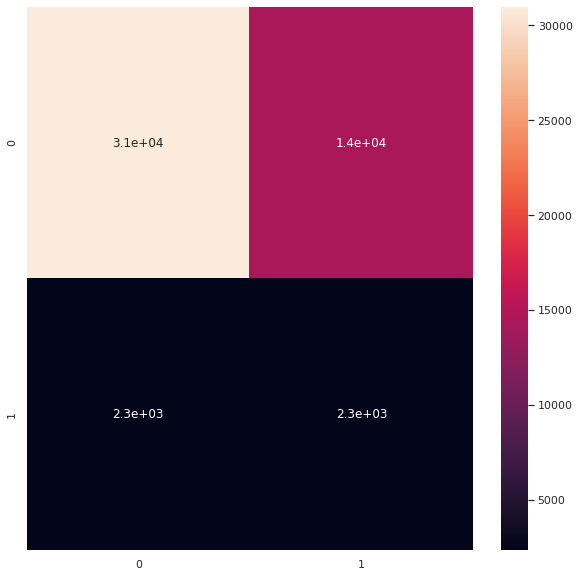

In [ ]:
sns.heatmap(CM[0], annot=True)

## Threshold decided on the basis of ZScore

In [ ]:
Thresholds = np.percentile(ZScore['Validation Z-score'], [75, 80, 85, 90, 95, 96, 97, 98, 99])

In [ ]:
Thresholds = [2, 4, 4.5, 3, 10]

In [ ]:
Anomaly = sequence_threshold(Anomaly, Thresholds[0], 'Test Z-score', future_window)
Anomaly

Test Loss  Test Z-score  ...  True Labels  Predicted Label
0       0.000023      0.996957  ...            0                0
1       0.000020      0.972819  ...            0                0
2       0.000013      0.949449  ...            0                0
3       0.000011      0.917739  ...            0                0
4       0.000012      0.915523  ...            0                0
...          ...           ...  ...          ...              ...
49995   0.000000      9.580094  ...            0                1
49996   0.000000      9.587549  ...            0                1
49997   0.000000      9.594152  ...            0                1
49998   0.000000      9.594784  ...            0                1
49999   0.000000      9.593081  ...            0                1

[50000 rows x 5 columns]

In [ ]:
CM = []
Metric_Table = []
ROC = []

for thresh in Thresholds:
  Anomaly = sequence_threshold(Anomaly, thresh, 'Test Z-score', future_window)
  metric, cm, roc = show_metrics_report(Anomaly['True Labels'], Anomaly['Predicted Label'])
  metric['Threshold'] = thresh
  Metric_Table.append(metric)
  CM.append(cm)
  ROC.append(roc)

Metric_Table = pd.DataFrame(Metric_Table)

In [ ]:
Metric_Table

Precision  Recall Score  F1 Score  AUC_score  Threshold
0   0.076529      0.272649  0.119513   0.467331        2.0
1   0.043785      0.133319  0.065920   0.417107        4.0
2   0.041739      0.124732  0.062547   0.415273        4.5
3   0.053889      0.174324  0.082328   0.429957        3.0
4   0.055023      0.041863  0.047549   0.484001       10.0

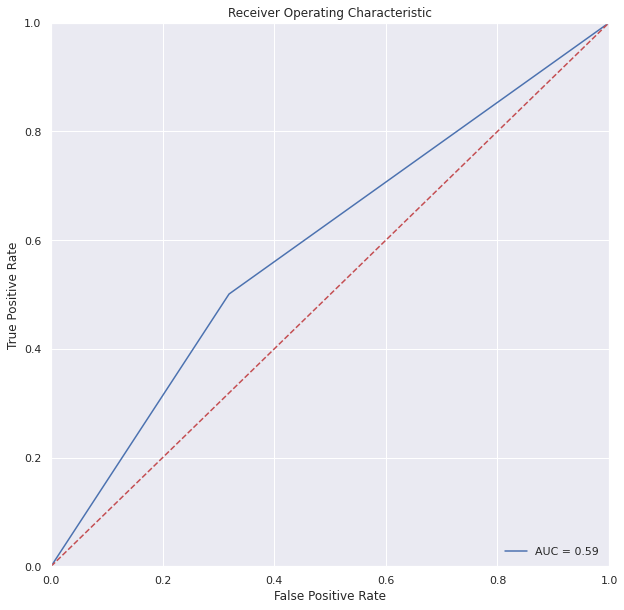

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(roc1[0], roc1[1], 'b', label = 'AUC = %0.2f' % auc_score1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Threshold 4: No of Anomalies = 1561')

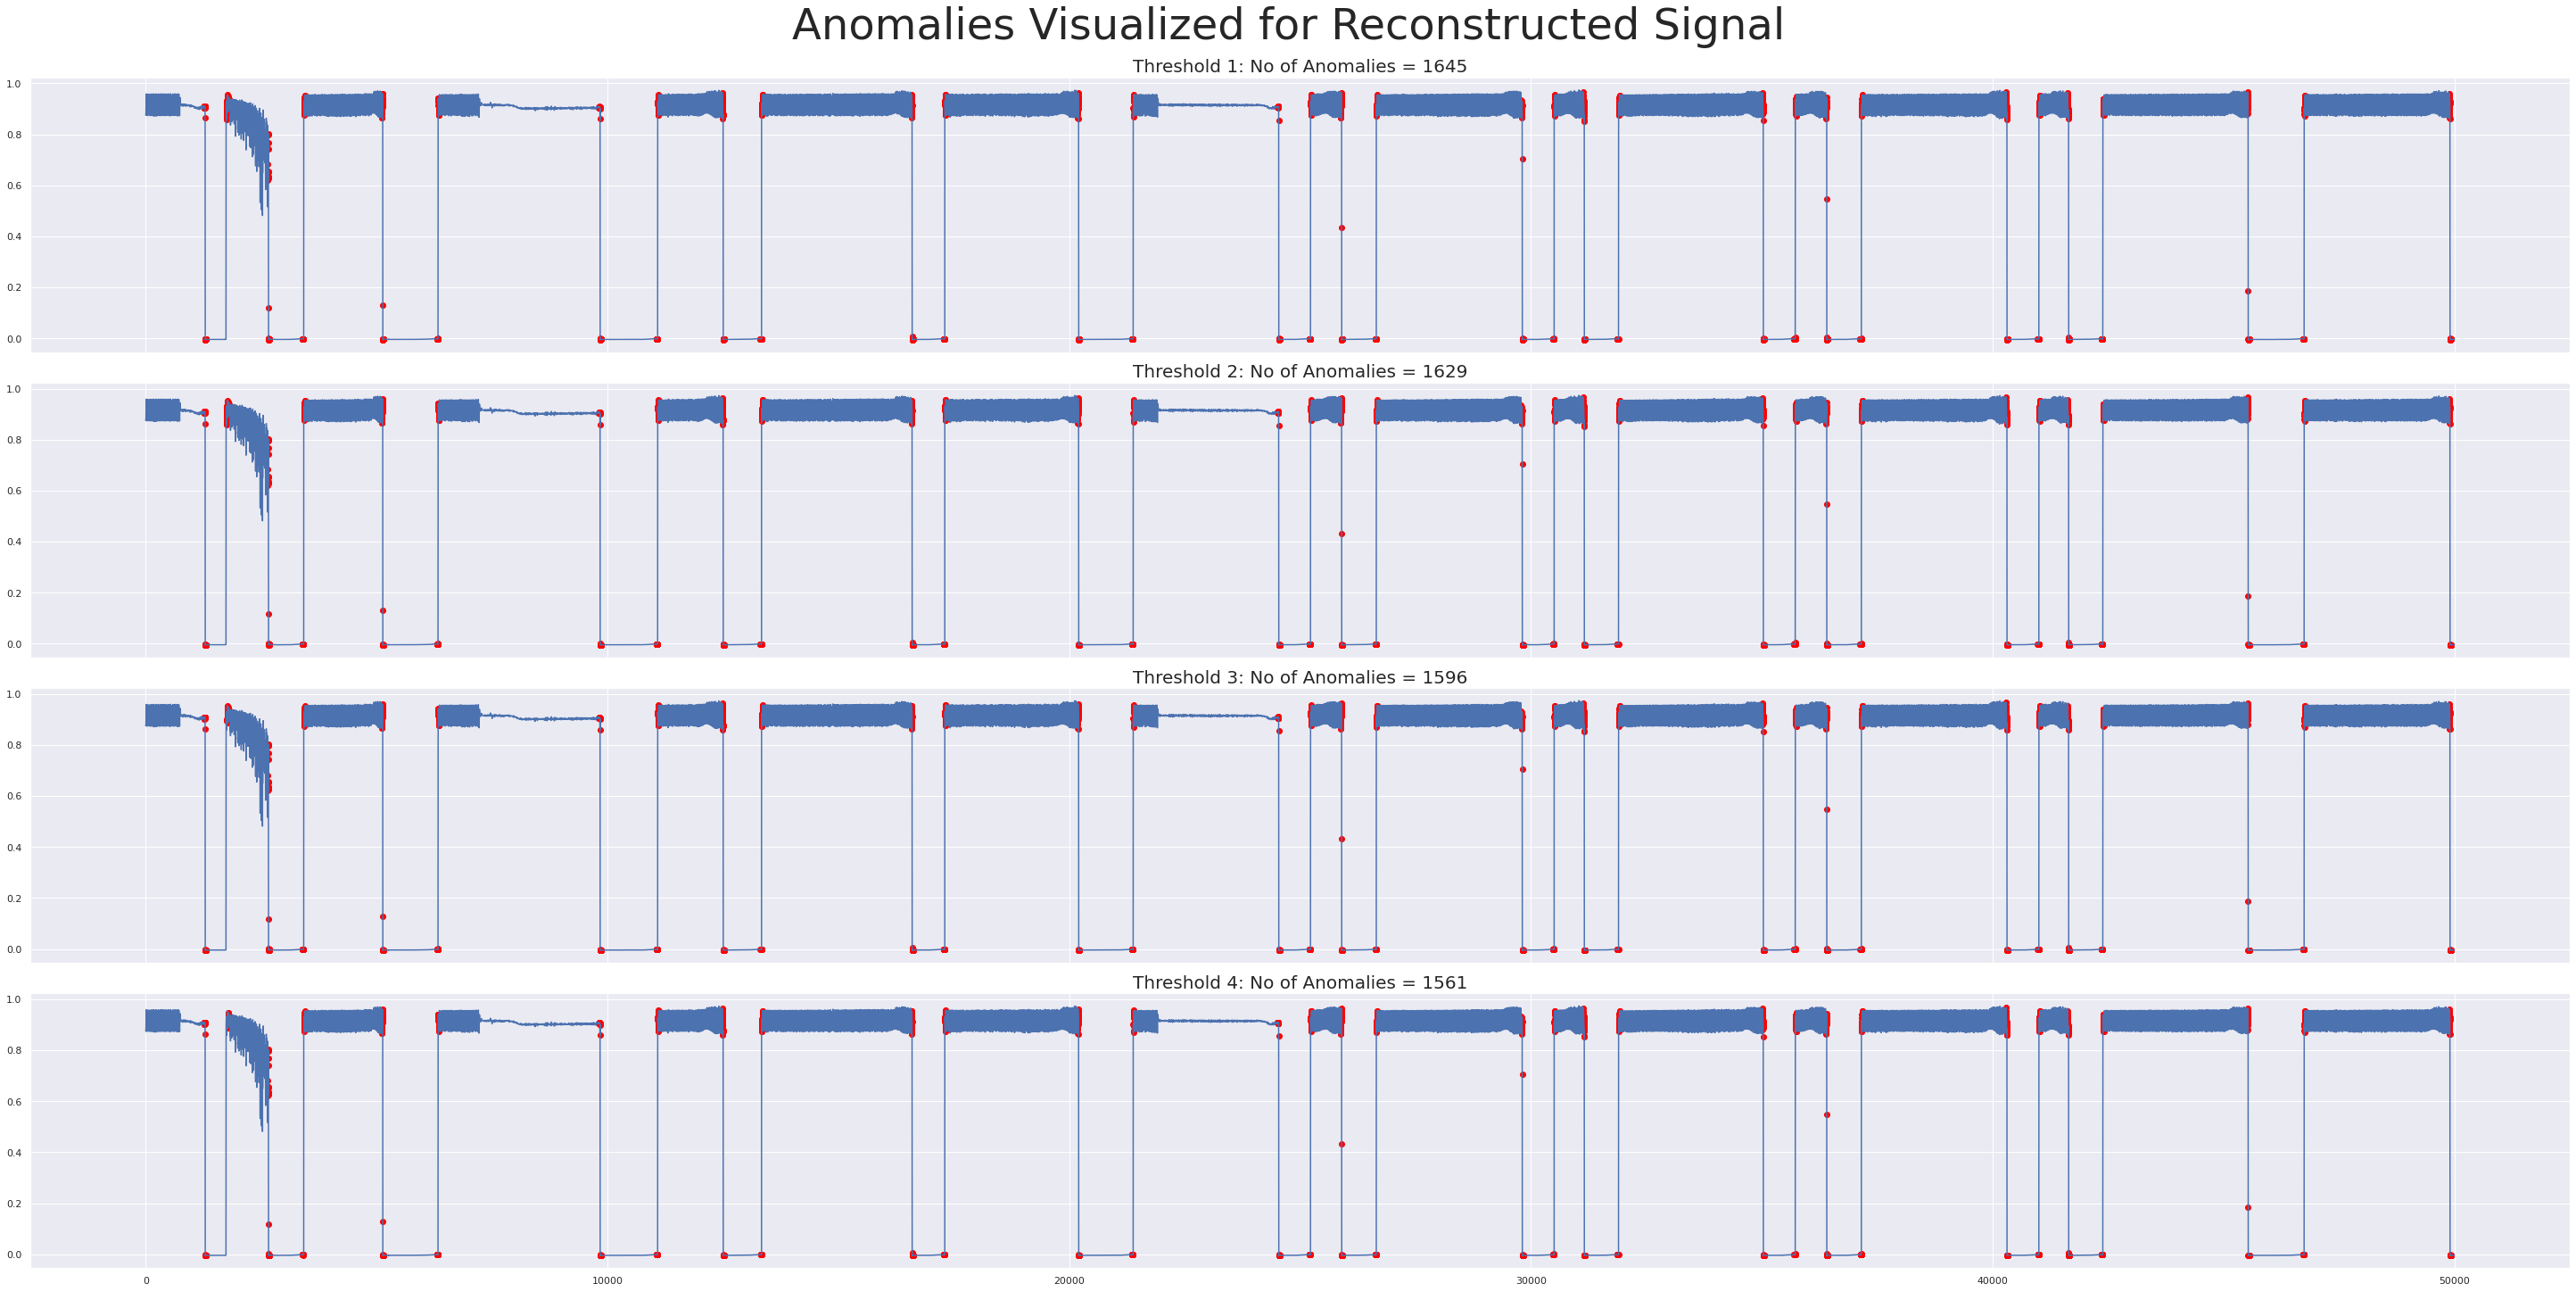

In [ ]:
signal = convert_3d_to_2d(test_x_predictions)[:,0]
threshold = [1.85, 1.9, 1.95, 2]
cols = 4
fig, ax1 = plt.subplots(cols, figsize = (40,20), sharex = True, constrained_layout=True)
for i in range(cols):
  Anomaly, markers = sequence_threshold(Anomaly, threshold[i], 'Test Z-score', future_window)
  ax1[i].plot(signal)
  for m in markers:
    ax1[i].scatter(m, signal[m], color="red")

fig.suptitle('Anomalies Visualized for Reconstructed Signal', fontsize = 48)
ax1[0].set_title('Threshold 1', fontsize = 20)
ax1[1].set_title('Threshold 2', fontsize = 20)
ax1[2].set_title('Threshold 3', fontsize = 20)
ax1[3].set_title('Threshold 4', fontsize = 20)

In [ ]:
# Create a color if the y axis value is equal or greater than 0
marker = np.where(Anomaly['Test Z-score']>= threshold, 'orange', 'skyblue')
 
# The vertical plot is made using the vline function
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the graph
plt.show()

### Calculate Classification Metrics

In [ ]:
_, _, _, cm1, auc_score1, roc1 = show_metrics_report(Anomaly['Labels for Reconstructed Data'], Anomaly['Thresh_1'])

Precision Score: 0.06409160827209025 Recall Score: 0.08050665521683126 f1 Score: 0.07136739937196687


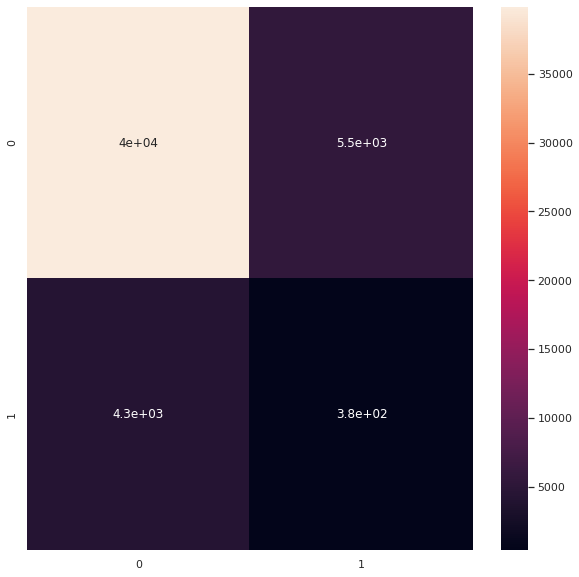

In [ ]:
sns.heatmap(cm1, annot=True)

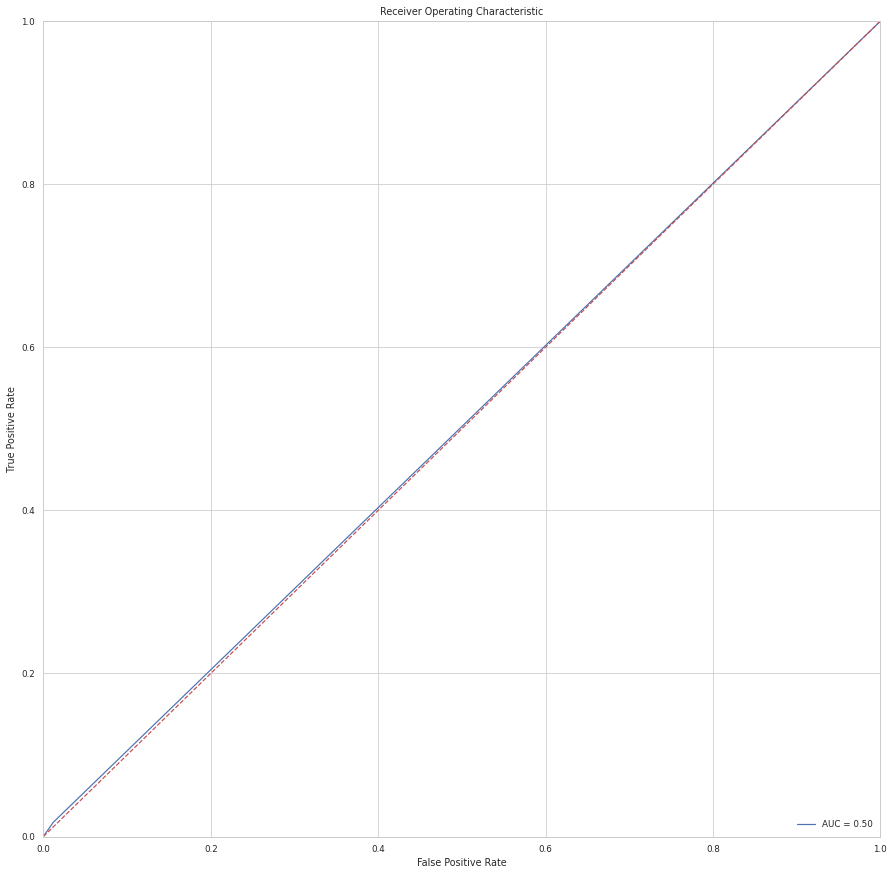

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(roc1[0], roc1[1], 'b', label = 'AUC = %0.2f' % auc_score1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
_, _, _, cm2, auc_score2, roc2 = show_metrics_report(Anomaly['True_Labels'], Anomaly['Thresh_2'])

Precision Score: 0.12084487534626039 Recall Score: 0.2996994418205238 f1 Score: 0.17223935842072796


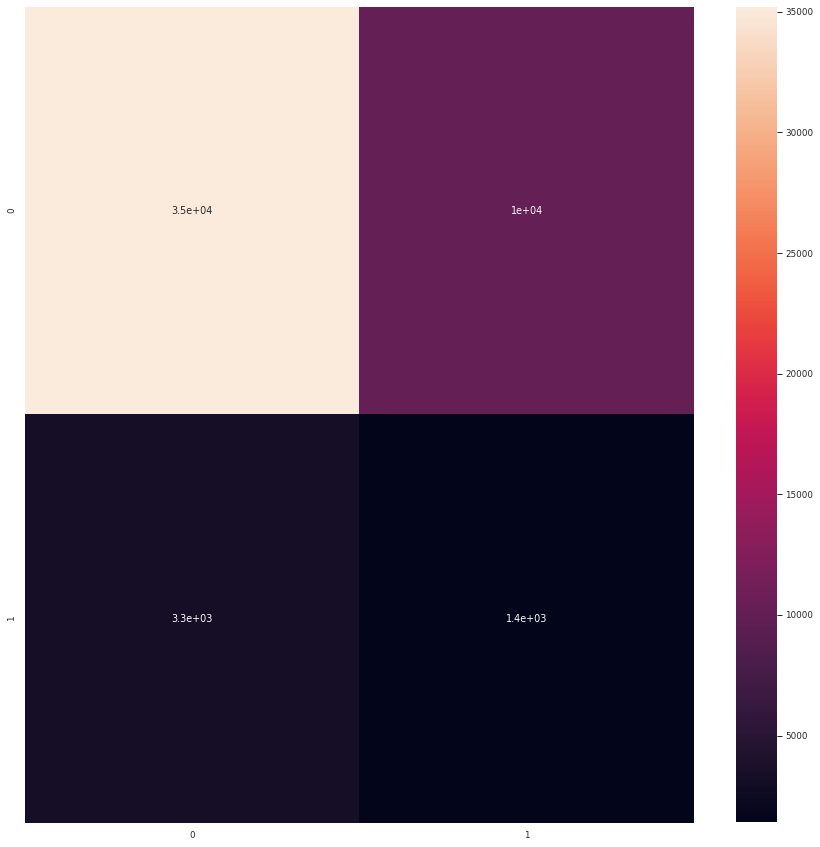

In [ ]:
sns.heatmap(cm2, annot=True)

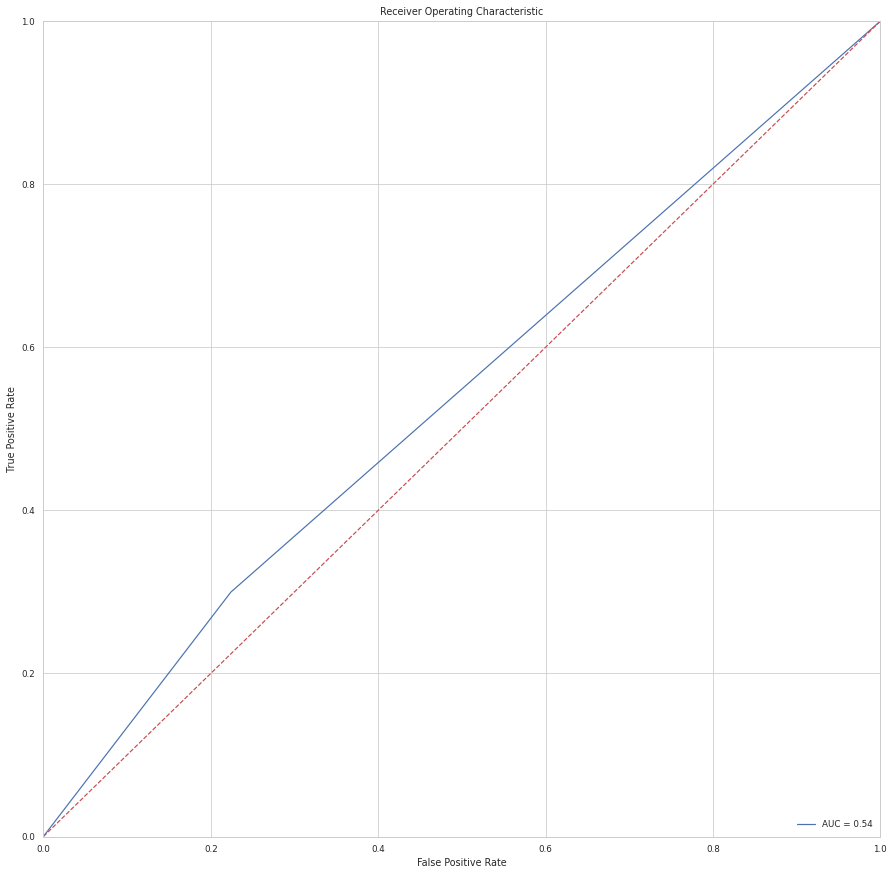

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(roc2[0], roc2[1], 'b', label = 'AUC = %0.2f' % auc_score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
_, _, _, cm3, auc_score3, roc3 = show_metrics_report(Anomaly['True_Labels'], Anomaly['Thresh_3'])

Precision Score: 0.10604558969276512 Recall Score: 0.06891369686560755 f1 Score: 0.08353936239427456


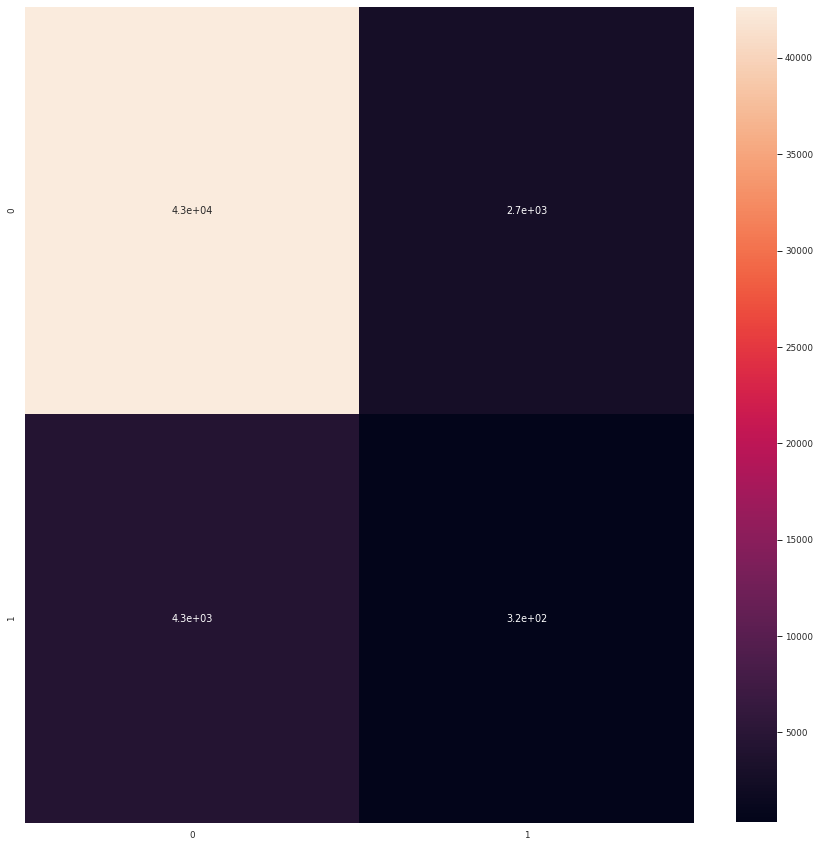

In [ ]:
sns.heatmap(cm3, annot=True)

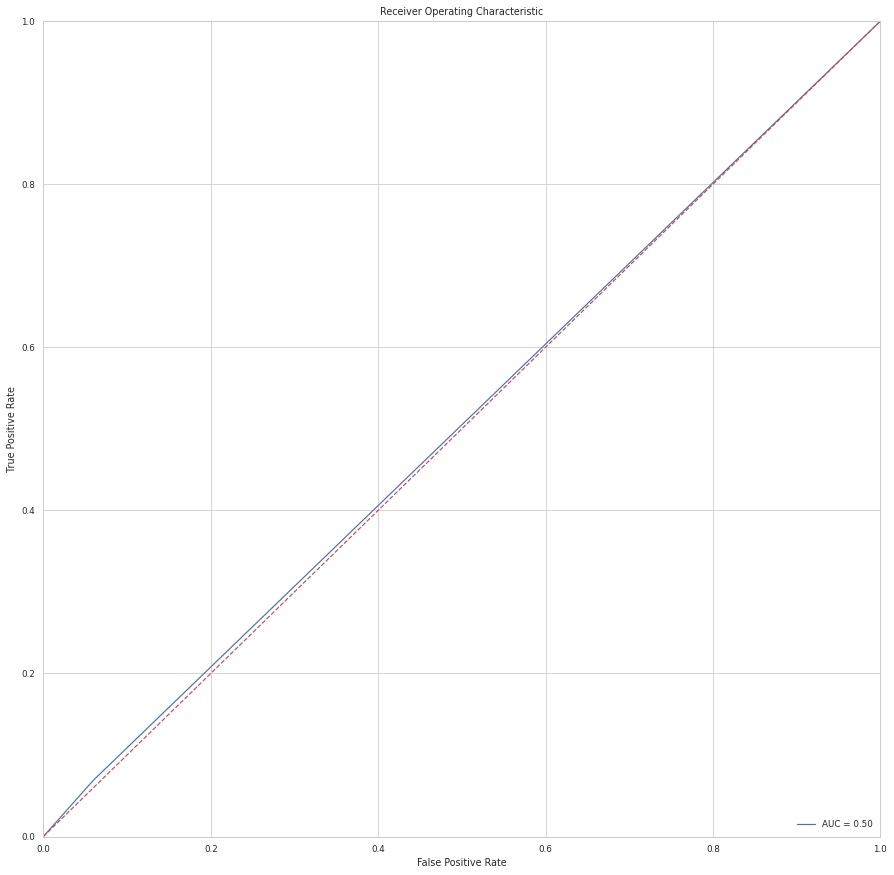

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(roc3[0], roc3[1], 'b', label = 'AUC = %0.2f' % auc_score3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()